# Proyecto 1.b - Análisis de Grafos de Conectividad

**parte 1 . Análisis Exploratorio de Datos (EDA)**:

Carga e Inspección de Datos, Visualización, Exploración de Señales EEG, Exploración de Señales de Audio, Estadísticas Descriptivas


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pathlib import Path
from IPython.display import Audio, display

np.random.seed(42)

DATA_DIR = Path("/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data")
SLOW_DIR = DATA_DIR / "slow"
FAST_DIR = DATA_DIR / "fast"

TOTAL_ELECTRODES = 65
GOOD_ELECTRODES_MATLAB = [2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 33, 34, 36, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 65]
GOOD_ELECTRODES_PY = [x - 1 for x in GOOD_ELECTRODES_MATLAB]
N_GOOD_ELECTRODES = len(GOOD_ELECTRODES_PY)

print(f"Directorio de datos: {DATA_DIR}")
print(f"Total de electrodos: {TOTAL_ELECTRODES}")
print(f"Electrodos buenos: {N_GOOD_ELECTRODES}")
slow_files = sorted(list(SLOW_DIR.glob("*.mat")))

fast_files = sorted(list(FAST_DIR.glob("*.mat")))




Directorio de datos: /Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data
Total de electrodos: 65
Electrodos buenos: 47


In [11]:
slow_files



[PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut01.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut02.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut03.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut04.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut05.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut06.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-audio/data/slow/bb01_ut07.mat'),
 PosixPath('/Users/ignaciagothe/Desktop/Desktop - MacBook Pro de Ignacia/TDA Git folder/tda-eeg-a

In [12]:
import re
from collections import defaultdict

def parse_filename(filepath):
    """Extrae baby_id y audio_id del nombre de archivo"""
    filename = filepath.stem  # bb01_ut03
    match = re.match(r'bb(\d+)_ut(\d+)', filename)
    if match:
        baby_id = f"bb{match.group(1)}"
        audio_id = f"ut{match.group(2)}"
        return baby_id, audio_id
    return None, None

# Analizar todos los archivos
slow_data = defaultdict(list)
fast_data = defaultdict(list)

for f in slow_files:
    baby_id, audio_id = parse_filename(f)
    if baby_id and audio_id:
        slow_data[baby_id].append(audio_id)

for f in fast_files:
    baby_id, audio_id = parse_filename(f)
    if baby_id and audio_id:
        fast_data[baby_id].append(audio_id)

# Ordenar
for baby in slow_data:
    slow_data[baby] = sorted(slow_data[baby])
for baby in fast_data:
    fast_data[baby] = sorted(fast_data[baby])

# Resumen
all_babies = sorted(set(list(slow_data.keys()) + list(fast_data.keys())))
all_audios_slow = sorted(set([audio for audios in slow_data.values() for audio in audios]))
all_audios_fast = sorted(set([audio for audios in fast_data.values() for audio in audios]))

print(f"{'='*60}")
print(f"RESUMEN DE DATOS")
print(f"{'='*60}")
print(f"\n📊 Bebés totales: {len(all_babies)}")
print(f"   Rango: {all_babies[0]} a {all_babies[-1]}")
print(f"\n🎵 Audios únicos (slow): {len(all_audios_slow)}")
print(f"   Rango: {all_audios_slow[0]} a {all_audios_slow[-1]}")
print(f"\n🎵 Audios únicos (fast): {len(all_audios_fast)}")
print(f"   Rango: {all_audios_fast[0]} a {all_audios_fast[-1]}")
print(f"\n📁 Archivos slow: {len(slow_files)}")
print(f"📁 Archivos fast: {len(fast_files)}")
print(f"📁 Total: {len(slow_files) + len(fast_files)}")
print(f"{'='*60}")

RESUMEN DE DATOS

📊 Bebés totales: 45
   Rango: bb01 a bb84

🎵 Audios únicos (slow): 23
   Rango: ut01 a ut23

🎵 Audios únicos (fast): 23
   Rango: ut01 a ut23

📁 Archivos slow: 710
📁 Archivos fast: 706
📁 Total: 1416


In [16]:
def resumen_archivo(data):
    eeg = data["subeeg"]
    audio = data["y"]
    fs_audio = int(data["Fs"][0, 0])
    dur_audio = audio.shape[0] / fs_audio
    fs_eeg = eeg.shape[0] / dur_audio
    return {
        "EEG forma": eeg.shape,
        "Audio forma": audio.shape,
        "Fs audio (Hz)": fs_audio,
        "Duración (s)": dur_audio,
        "Fs EEG (Hz)": fs_eeg,
    }, eeg, audio, fs_audio, fs_eeg

res_slow, eeg_slow, audio_slow, fs_audio, fs_eeg = resumen_archivo(data_slow)
res_fast, eeg_fast, audio_fast, fs_audio_fast, fs_eeg_fast = resumen_archivo(data_fast)

Fs_audio = fs_audio
Fs_eeg = int(round(fs_eeg))

resumen_df = pd.DataFrame([
    {"Condición": "Lenta", **res_slow},
    {"Condición": "Rápida", **res_fast},
]).set_index("Condición").round(2)

display(resumen_df)

EEG forma  Audio forma  Fs audio (Hz)  Duración (s)  Fs EEG (Hz)
Condición                                                                   
Lenta      (4606, 65)  (812543, 2)          44100         18.43       249.99
Rápida     (2879, 65)  (507839, 2)          44100         11.52       250.01

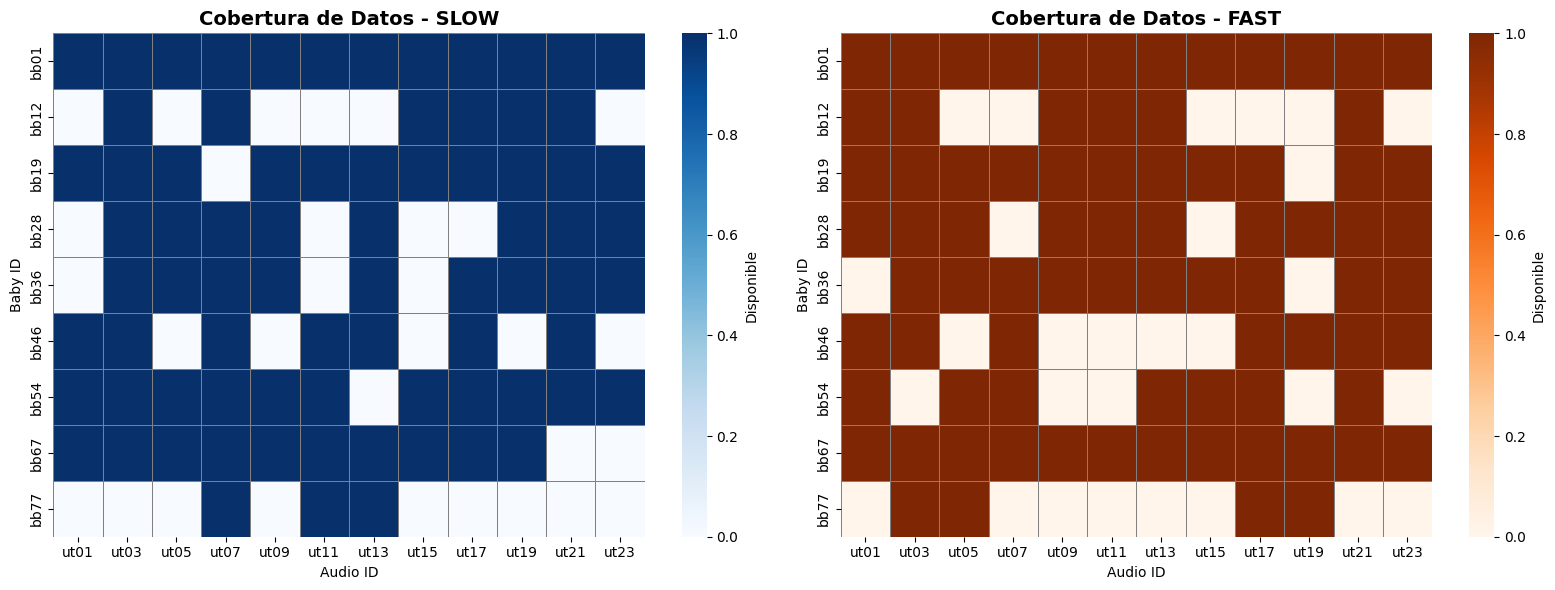

Visualización de muestra: 9 bebés x 12 audios
Azul oscuro/Naranja oscuro = datos disponibles

ANÁLISIS DE COMPLETITUD DE PARES

✅ Bebés con pares completos (slow+fast): 45/45
⚠️  Bebés con datos incompletos: 43/45

📊 Estadísticas de pares completos por bebé:
       n_completos  n_solo_slow  n_solo_fast
count    45.000000    45.000000    45.000000
mean     11.955556     3.822222     3.733333
std       6.532978     2.534210     2.339386
min       1.000000     0.000000     0.000000
25%       7.000000     2.000000     2.000000
50%      12.000000     4.000000     4.000000
75%      17.000000     5.000000     6.000000
max      23.000000    11.000000     9.000000

📝 Ejemplos de bebés con pares completos:


baby_id  n_completos  n_solo_slow  n_solo_fast
0    bb01           23            0            0
1    bb02           21            0            2
2    bb04           22            0            1
3    bb05           11            8            1
4    bb09           20            1            1
5    bb12            7            5            7
6    bb13           12            5            3
7    bb14            3           11            4
8    bb15           22            1            0
9    bb17            7            3            3

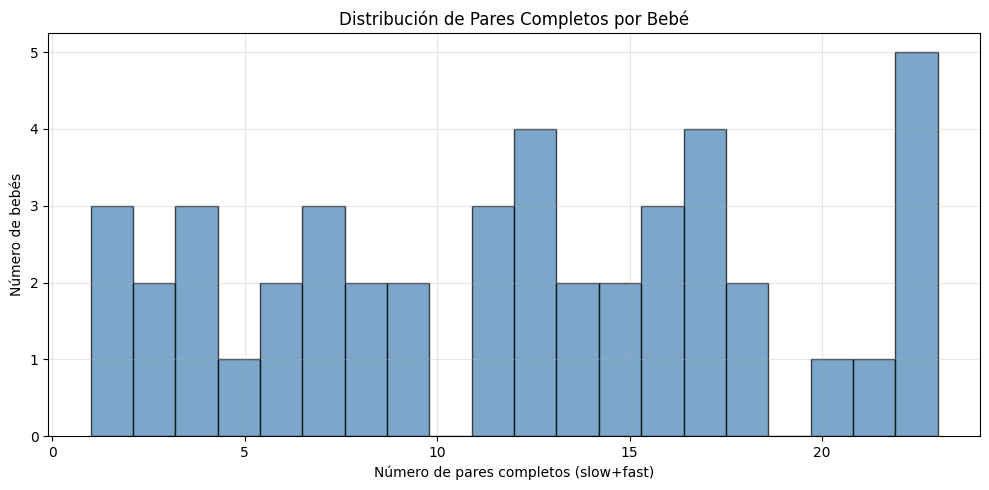


ANÁLISIS INTRA-SUJETO: bb01
Audios analizados: ['ut01', 'ut02', 'ut03']
Total de pares completos para este bebé: 23



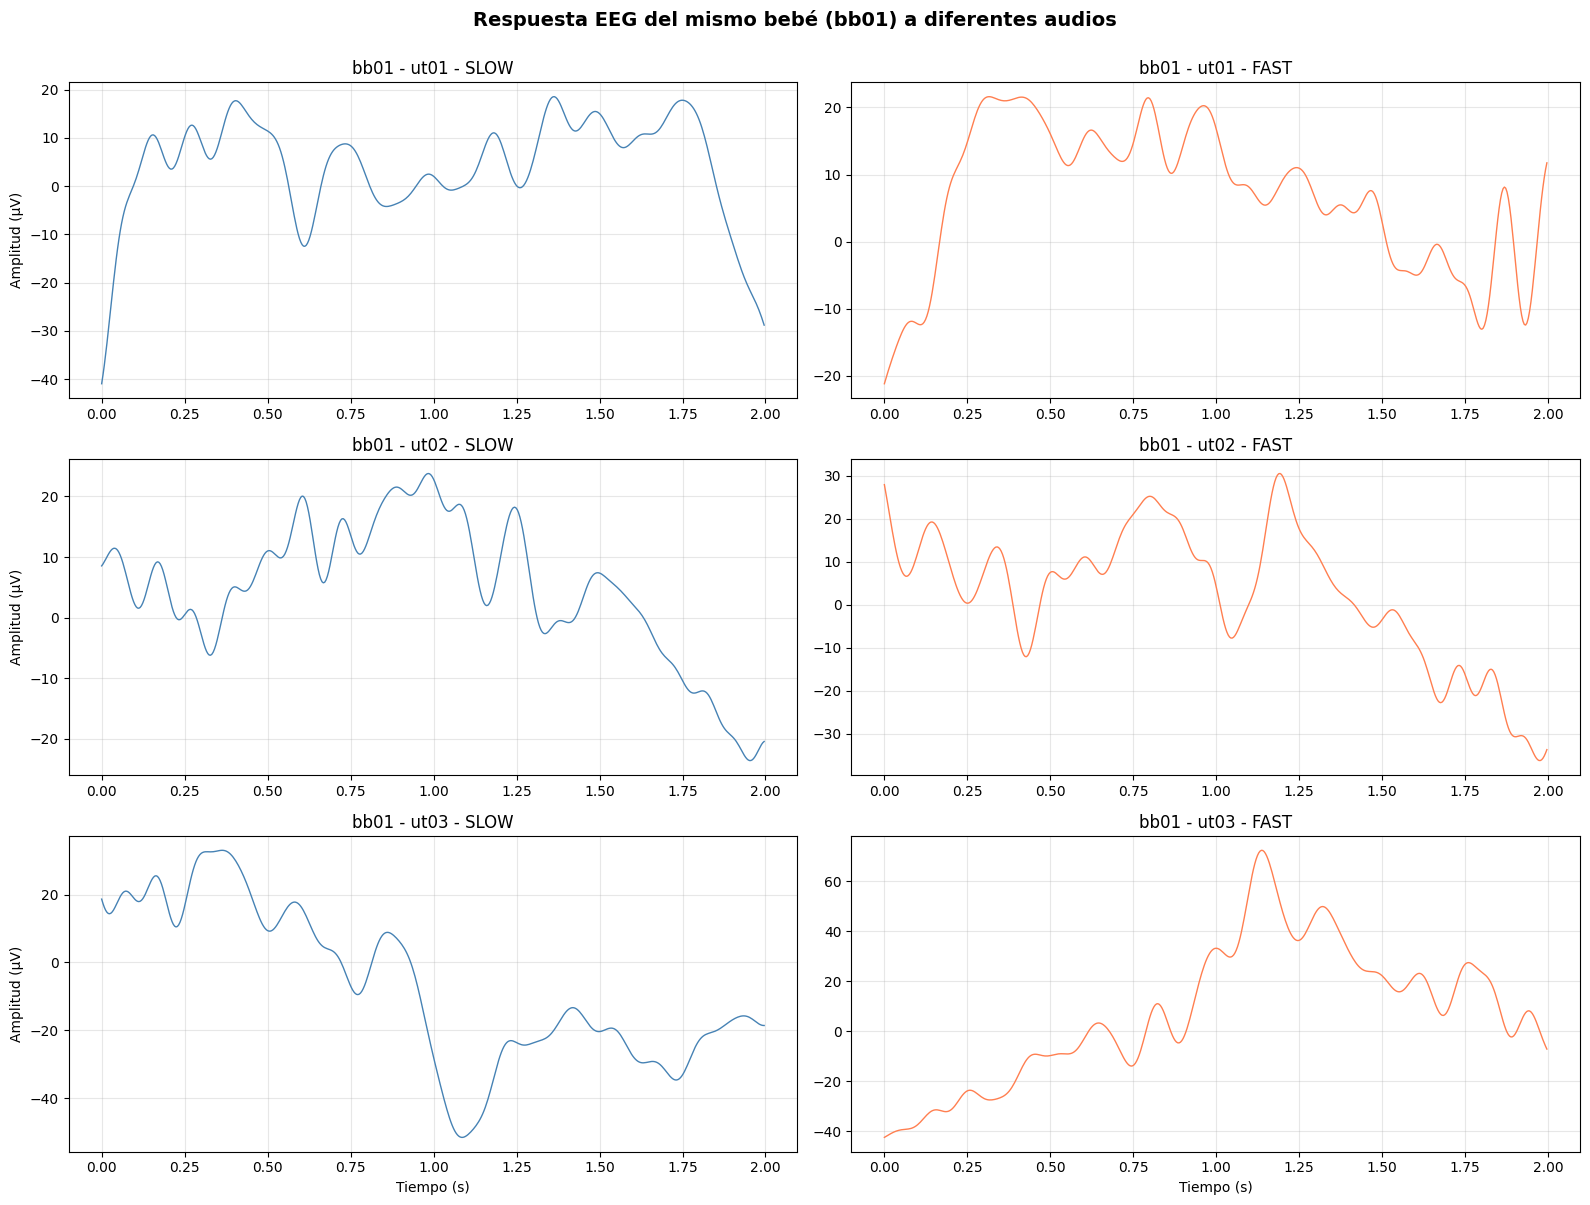

Cada fila muestra la respuesta del bb01 a un audio diferente
Columna izquierda: condición SLOW | Columna derecha: condición FAST

ANÁLISIS INTER-SUJETO: ut07
Este audio fue escuchado por 26 bebés
Mostraremos la respuesta de 4 bebés diferentes al mismo audio



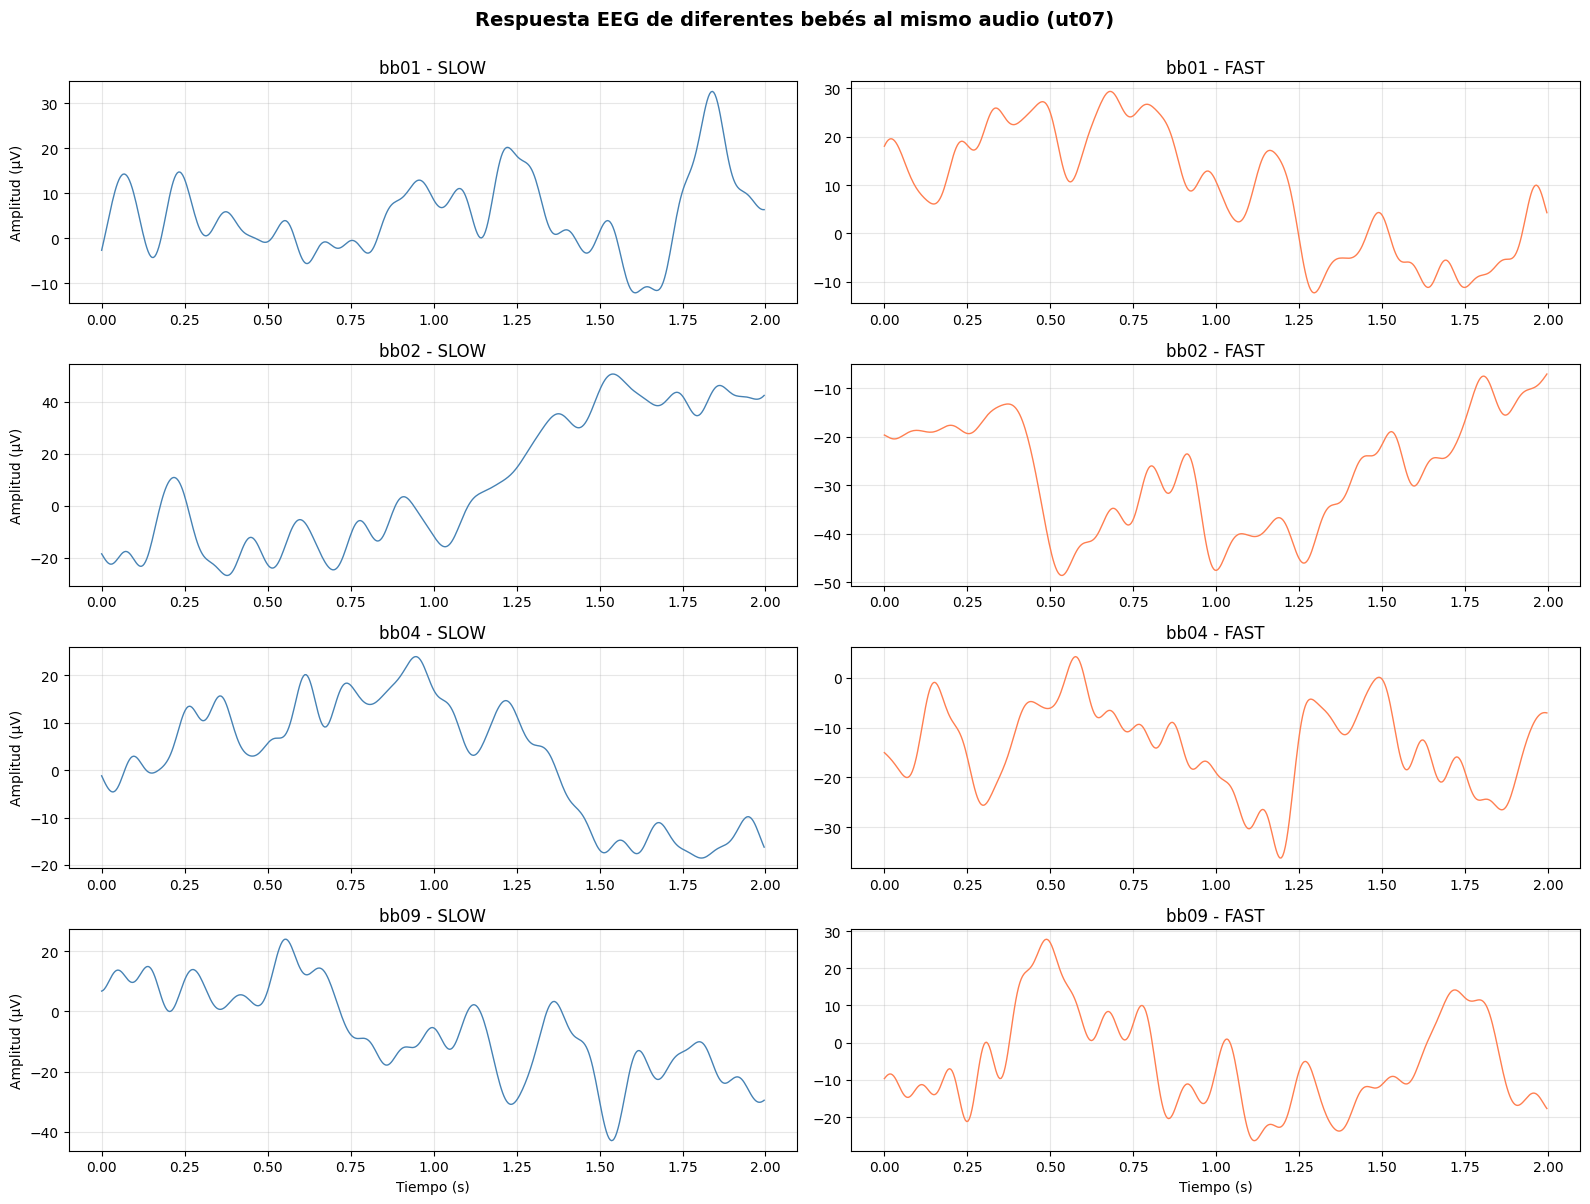


Cada fila muestra un bebé diferente escuchando ut07
Columna izquierda: condición SLOW | Columna derecha: condición FAST
Observar variabilidad inter-sujeto en la respuesta cerebral


In [17]:
# Crear matriz de cobertura: Bebés x Audios
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar muestra representativa para visualización
sample_babies = all_babies[::5][:20]  # Cada 5 bebés, máximo 20
sample_audios = all_audios_slow[::2][:20]  # Cada 2 audios, máximo 20

# Crear matriz de cobertura
coverage_slow = np.zeros((len(sample_babies), len(sample_audios)))
coverage_fast = np.zeros((len(sample_babies), len(sample_audios)))

for i, baby in enumerate(sample_babies):
    for j, audio in enumerate(sample_audios):
        coverage_slow[i, j] = 1 if audio in slow_data.get(baby, []) else 0
        coverage_fast[i, j] = 1 if audio in fast_data.get(baby, []) else 0

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(coverage_slow, ax=axes[0], cmap='Blues', cbar_kws={'label': 'Disponible'},
            xticklabels=sample_audios, yticklabels=sample_babies,
            linewidths=0.5, linecolor='gray')
axes[0].set_title('Cobertura de Datos - SLOW', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Audio ID')
axes[0].set_ylabel('Baby ID')

sns.heatmap(coverage_fast, ax=axes[1], cmap='Oranges', cbar_kws={'label': 'Disponible'},
            xticklabels=sample_audios, yticklabels=sample_babies,
            linewidths=0.5, linecolor='gray')
axes[1].set_title('Cobertura de Datos - FAST', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Audio ID')
axes[1].set_ylabel('Baby ID')

plt.tight_layout()
plt.show()

print(f"Visualización de muestra: {len(sample_babies)} bebés x {len(sample_audios)} audios")
print("Azul oscuro/Naranja oscuro = datos disponibles")

# Análisis de completitud: ¿Cuántos bebés tienen pares completos slow-fast?
pares_completos = []
pares_incompletos = []

for baby in all_babies:
    audios_slow = set(slow_data.get(baby, []))
    audios_fast = set(fast_data.get(baby, []))
    
    # Audios con ambas condiciones
    completos = audios_slow & audios_fast
    # Audios solo en una condición
    solo_slow = audios_slow - audios_fast
    solo_fast = audios_fast - audios_slow
    
    if len(completos) > 0:
        pares_completos.append({
            'baby_id': baby,
            'n_completos': len(completos),
            'n_solo_slow': len(solo_slow),
            'n_solo_fast': len(solo_fast),
            'audios_completos': sorted(completos)
        })
    
    if len(solo_slow) > 0 or len(solo_fast) > 0:
        pares_incompletos.append({
            'baby_id': baby,
            'solo_slow': sorted(solo_slow),
            'solo_fast': sorted(solo_fast)
        })

df_completos = pd.DataFrame(pares_completos)

print(f"\n{'='*60}")
print(f"ANÁLISIS DE COMPLETITUD DE PARES")
print(f"{'='*60}\n")
print(f"✅ Bebés con pares completos (slow+fast): {len(pares_completos)}/{len(all_babies)}")
print(f"⚠️  Bebés con datos incompletos: {len(pares_incompletos)}/{len(all_babies)}")

if len(pares_completos) > 0:
    print(f"\n📊 Estadísticas de pares completos por bebé:")
    print(df_completos[['baby_id', 'n_completos', 'n_solo_slow', 'n_solo_fast']].describe())
    
    # Mostrar algunos ejemplos
    print(f"\n📝 Ejemplos de bebés con pares completos:")
    display(df_completos[['baby_id', 'n_completos', 'n_solo_slow', 'n_solo_fast']].head(10))

# Histograma de audios completos por bebé
if len(pares_completos) > 0:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(df_completos['n_completos'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_xlabel('Número de pares completos (slow+fast)')
    ax.set_ylabel('Número de bebés')
    ax.set_title('Distribución de Pares Completos por Bebé')
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Comparación de un mismo bebé escuchando diferentes audios
# Seleccionar un bebé con múltiples pares completos
if len(pares_completos) > 0:
    # Bebé con más pares completos
    baby_ejemplo = df_completos.loc[df_completos['n_completos'].idxmax()]
    baby_id = baby_ejemplo['baby_id']
    audios_ejemplo = baby_ejemplo['audios_completos'][:3]  # Primeros 3 audios
    
    print(f"\n{'='*60}")
    print(f"ANÁLISIS INTRA-SUJETO: {baby_id}")
    print(f"{'='*60}")
    print(f"Audios analizados: {audios_ejemplo}")
    print(f"Total de pares completos para este bebé: {baby_ejemplo['n_completos']}\n")
    
    # Cargar datos para cada audio
    fig, axes = plt.subplots(len(audios_ejemplo), 2, figsize=(16, 4*len(audios_ejemplo)))
    
    for idx, audio_id in enumerate(audios_ejemplo):
        # Encontrar archivos
        slow_file = [f for f in slow_files if f.stem == f"{baby_id}_{audio_id}"][0]
        fast_file = [f for f in fast_files if f.stem == f"{baby_id}_{audio_id}"][0]
        
        # Cargar datos
        data_slow = loadmat(slow_file)
        data_fast = loadmat(fast_file)
        
        eeg_slow = data_slow["subeeg"]
        eeg_fast = data_fast["subeeg"]
        
        # Transponer si necesario
        if eeg_slow.shape[0] > eeg_slow.shape[1]:
            eeg_slow = eeg_slow.T
            eeg_fast = eeg_fast.T
        
        # Seleccionar buenos electrodos
        eeg_slow_good = eeg_slow[GOOD_ELECTRODES_PY, :]
        eeg_fast_good = eeg_fast[GOOD_ELECTRODES_PY, :]
        
        # Graficar señal EEG (primer electrodo, primeros 2 segundos)
        electrode = 0
        duration = 2
        samples = int(duration * Fs_eeg)
        time = np.arange(samples) / Fs_eeg
        
        axes[idx, 0].plot(time, eeg_slow_good[electrode, :samples], color='steelblue', linewidth=1)
        axes[idx, 0].set_title(f'{baby_id} - {audio_id} - SLOW')
        axes[idx, 0].set_ylabel('Amplitud (μV)')
        axes[idx, 0].grid(alpha=0.3)
        
        axes[idx, 1].plot(time, eeg_fast_good[electrode, :samples], color='coral', linewidth=1)
        axes[idx, 1].set_title(f'{baby_id} - {audio_id} - FAST')
        axes[idx, 1].grid(alpha=0.3)
        
        if idx == len(audios_ejemplo) - 1:
            axes[idx, 0].set_xlabel('Tiempo (s)')
            axes[idx, 1].set_xlabel('Tiempo (s)')
    
    plt.suptitle(f'Respuesta EEG del mismo bebé ({baby_id}) a diferentes audios', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    print(f"Cada fila muestra la respuesta del {baby_id} a un audio diferente")
    print(f"Columna izquierda: condición SLOW | Columna derecha: condición FAST")
# Comparación INTER-SUJETO: Diferentes bebés escuchando el mismo audio
# Encontrar el audio más común (que más bebés escucharon)
from collections import Counter

audio_counts = Counter()
for baby in all_babies:
    audios_completos = set(slow_data.get(baby, [])) & set(fast_data.get(baby, []))
    audio_counts.update(audios_completos)

if len(audio_counts) > 0:
    audio_mas_comun, n_bebes = audio_counts.most_common(1)[0]
    
    print(f"\n{'='*60}")
    print(f"ANÁLISIS INTER-SUJETO: {audio_mas_comun}")
    print(f"{'='*60}")
    print(f"Este audio fue escuchado por {n_bebes} bebés")
    print(f"Mostraremos la respuesta de 4 bebés diferentes al mismo audio\n")
    
    # Encontrar bebés que escucharon este audio
    bebes_con_audio = [baby for baby in all_babies 
                       if audio_mas_comun in slow_data.get(baby, []) 
                       and audio_mas_comun in fast_data.get(baby, [])]
    
    bebes_muestra = bebes_con_audio[:4]  # Primeros 4 bebés
    
    fig, axes = plt.subplots(len(bebes_muestra), 2, figsize=(16, 3*len(bebes_muestra)))
    
    for idx, baby_id in enumerate(bebes_muestra):
        # Encontrar archivos
        slow_file = [f for f in slow_files if f.stem == f"{baby_id}_{audio_mas_comun}"][0]
        fast_file = [f for f in fast_files if f.stem == f"{baby_id}_{audio_mas_comun}"][0]
        
        # Cargar datos
        data_slow = loadmat(slow_file)
        data_fast = loadmat(fast_file)
        
        eeg_slow = data_slow["subeeg"]
        eeg_fast = data_fast["subeeg"]
        
        # Transponer si necesario
        if eeg_slow.shape[0] > eeg_slow.shape[1]:
            eeg_slow = eeg_slow.T
            eeg_fast = eeg_fast.T
        
        # Seleccionar buenos electrodos
        eeg_slow_good = eeg_slow[GOOD_ELECTRODES_PY, :]
        eeg_fast_good = eeg_fast[GOOD_ELECTRODES_PY, :]
        
        # Graficar
        electrode = 0
        duration = 2
        samples = int(duration * Fs_eeg)
        time = np.arange(samples) / Fs_eeg
        
        axes[idx, 0].plot(time, eeg_slow_good[electrode, :samples], color='steelblue', linewidth=1)
        axes[idx, 0].set_title(f'{baby_id} - SLOW')
        axes[idx, 0].set_ylabel('Amplitud (μV)')
        axes[idx, 0].grid(alpha=0.3)
        
        axes[idx, 1].plot(time, eeg_fast_good[electrode, :samples], color='coral', linewidth=1)
        axes[idx, 1].set_title(f'{baby_id} - FAST')
        axes[idx, 1].grid(alpha=0.3)
        
        if idx == len(bebes_muestra) - 1:
            axes[idx, 0].set_xlabel('Tiempo (s)')
            axes[idx, 1].set_xlabel('Tiempo (s)')
    
    plt.suptitle(f'Respuesta EEG de diferentes bebés al mismo audio ({audio_mas_comun})', 
                 fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    print(f"\nCada fila muestra un bebé diferente escuchando {audio_mas_comun}")
    print(f"Columna izquierda: condición SLOW | Columna derecha: condición FAST")
    print(f"Observar variabilidad inter-sujeto en la respuesta cerebral")


ANÁLISIS DE DURACIÓN DE GRABACIONES

Muestra analizada: 50 archivos de cada condición

       Audio Slow (s)  Audio Fast (s)  EEG Slow (s)  EEG Fast (s)
count       50.000000       50.000000     50.000000      50.00000
mean        21.033273       13.043130     21.034000      13.04384
std          1.522844        1.018534      1.523309       1.01853
min         17.043333       10.652086     17.044000      10.65200
25%         20.035425       12.446621     20.035000      12.44800
50%         21.290000       13.135420     21.292000      13.13600
75%         22.435011       13.963549     22.436000      13.96500
max         22.963333       14.352086     22.964000      14.35200


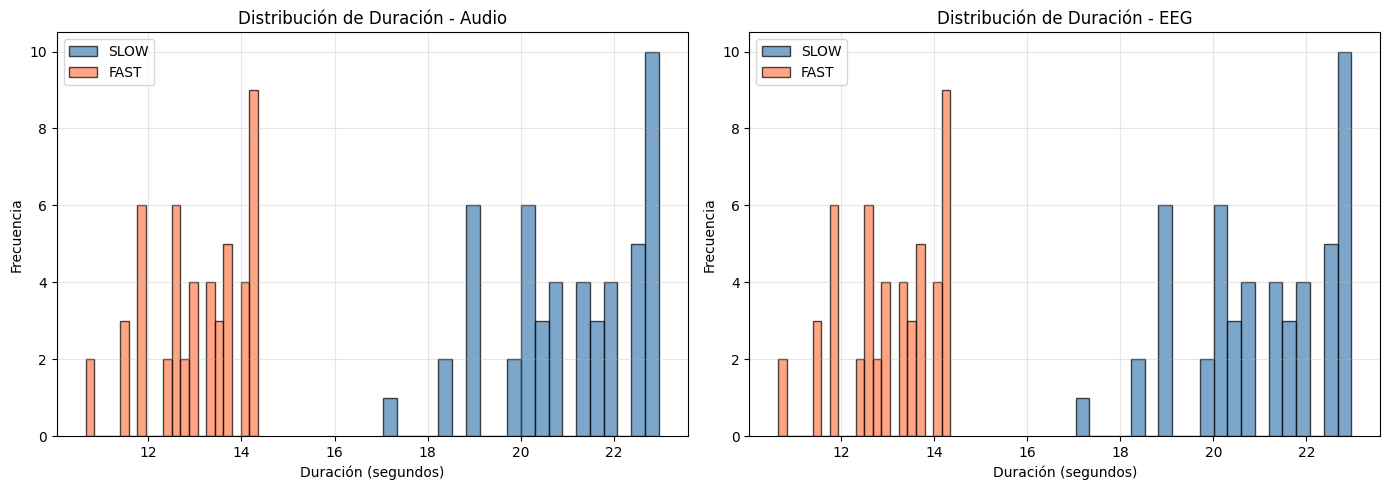


📊 Ratio de duración (Slow/Fast):
   Media: 1.62x
   Mediana: 1.60x
   Rango: 1.28x - 1.98x

Interpretación: Los audios 'slow' son ~1.6 veces más largos que 'fast'


In [18]:
# Análisis de duración de grabaciones
print(f"\n{'='*60}")
print(f"ANÁLISIS DE DURACIÓN DE GRABACIONES")
print(f"{'='*60}\n")

duraciones_slow = []
duraciones_fast = []
duraciones_eeg_slow = []
duraciones_eeg_fast = []

# Muestrear 50 archivos de cada condición
n_sample = min(50, len(slow_files), len(fast_files))

for i in range(n_sample):
    # Slow
    data_s = loadmat(slow_files[i])
    audio_s = data_s["y"]
    eeg_s = data_s["subeeg"]
    fs_audio = int(data_s["Fs"][0, 0])
    
    dur_audio_s = len(audio_s) / fs_audio
    dur_eeg_s = eeg_s.shape[1] / Fs_eeg if eeg_s.shape[1] > eeg_s.shape[0] else eeg_s.shape[0] / Fs_eeg
    
    duraciones_slow.append(dur_audio_s)
    duraciones_eeg_slow.append(dur_eeg_s)
    
    # Fast
    data_f = loadmat(fast_files[i])
    audio_f = data_f["y"]
    eeg_f = data_f["subeeg"]
    
    dur_audio_f = len(audio_f) / fs_audio
    dur_eeg_f = eeg_f.shape[1] / Fs_eeg if eeg_f.shape[1] > eeg_f.shape[0] else eeg_f.shape[0] / Fs_eeg
    
    duraciones_fast.append(dur_audio_f)
    duraciones_eeg_fast.append(dur_eeg_f)

# Estadísticas
df_duraciones = pd.DataFrame({
    'Audio Slow (s)': duraciones_slow,
    'Audio Fast (s)': duraciones_fast,
    'EEG Slow (s)': duraciones_eeg_slow,
    'EEG Fast (s)': duraciones_eeg_fast
})

print(f"Muestra analizada: {n_sample} archivos de cada condición\n")
print(df_duraciones.describe())

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(duraciones_slow, bins=20, alpha=0.7, label='SLOW', color='steelblue', edgecolor='black')
axes[0].hist(duraciones_fast, bins=20, alpha=0.7, label='FAST', color='coral', edgecolor='black')
axes[0].set_xlabel('Duración (segundos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Duración - Audio')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(duraciones_eeg_slow, bins=20, alpha=0.7, label='SLOW', color='steelblue', edgecolor='black')
axes[1].hist(duraciones_eeg_fast, bins=20, alpha=0.7, label='FAST', color='coral', edgecolor='black')
axes[1].set_xlabel('Duración (segundos)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Duración - EEG')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Ratio de velocidad
ratios = np.array(duraciones_slow) / np.array(duraciones_fast)
print(f"\n📊 Ratio de duración (Slow/Fast):")
print(f"   Media: {np.mean(ratios):.2f}x")
print(f"   Mediana: {np.median(ratios):.2f}x")
print(f"   Rango: {np.min(ratios):.2f}x - {np.max(ratios):.2f}x")
print(f"\nInterpretación: Los audios 'slow' son ~{np.mean(ratios):.1f} veces más largos que 'fast'")

## Análisis de Nomenclatura de Archivos

**Convención de nombres**: `bb{ID}_ut{AUDIO}.mat`

- `bb01` a `bb80+`: ID único de cada bebé
- `ut01`, `ut02`, etc.: Diferentes audios (tracks)
- Cada bebé escucha el mismo audio en **dos condiciones**: lenta (slow) y rápida (fast)


In [19]:

print(f"Archivos audio lento: {len(slow_files)}")
print(f"Archivos audio rápido: {len(fast_files)}")
print(f"Total: {len(slow_files) + len(fast_files)}")


sample_slow_file = slow_files[0]
sample_fast_file = fast_files[0]

data_slow = loadmat(sample_slow_file)
data_fast = loadmat(sample_fast_file)

print("ARCHIVO LENTO:")
for key in data_slow.keys():
    if not key.startswith("__"):
        print(f"  {key}: shape {data_slow[key].shape}")

print("\nARCHIVO RÁPIDO:")
for key in data_fast.keys():
    if not key.startswith("__"):
        print(f"  {key}: shape {data_fast[key].shape}")

Archivos audio lento: 710
Archivos audio rápido: 706
Total: 1416
ARCHIVO LENTO:
  Fs: shape (1, 1)
  subeeg: shape (4606, 65)
  y: shape (812543, 2)

ARCHIVO RÁPIDO:
  Fs: shape (1, 1)
  subeeg: shape (2879, 65)
  y: shape (507839, 2)


eeg_slow.shape = (65, 5609)
Esperado: (65, n_muestras) donde n_muestras >> 65
Orientación correcta
EEG original: (65, 5609)
EEG buenos electrodos: (47, 5609)
Removidos: 18 electrodos

EEG Lento:
  NaN: 0
  Min: -207.070099, Max: 152.428055
  Media: -0.000001, Std: 39.682354

EEG Rápido:
  NaN: 0
  Min: -132.612167, Max: 184.269302
  Media: -0.000001, Std: 25.635380

Audio Lento:
  NaN: 0
  Min: -0.953674, Max: 0.854736
  Media: 0.000000, Std: 0.096133

Audio Rápido:
  NaN: 0
  Min: -0.897186, Max: 0.793427
  Media: 0.000005, Std: 0.082441


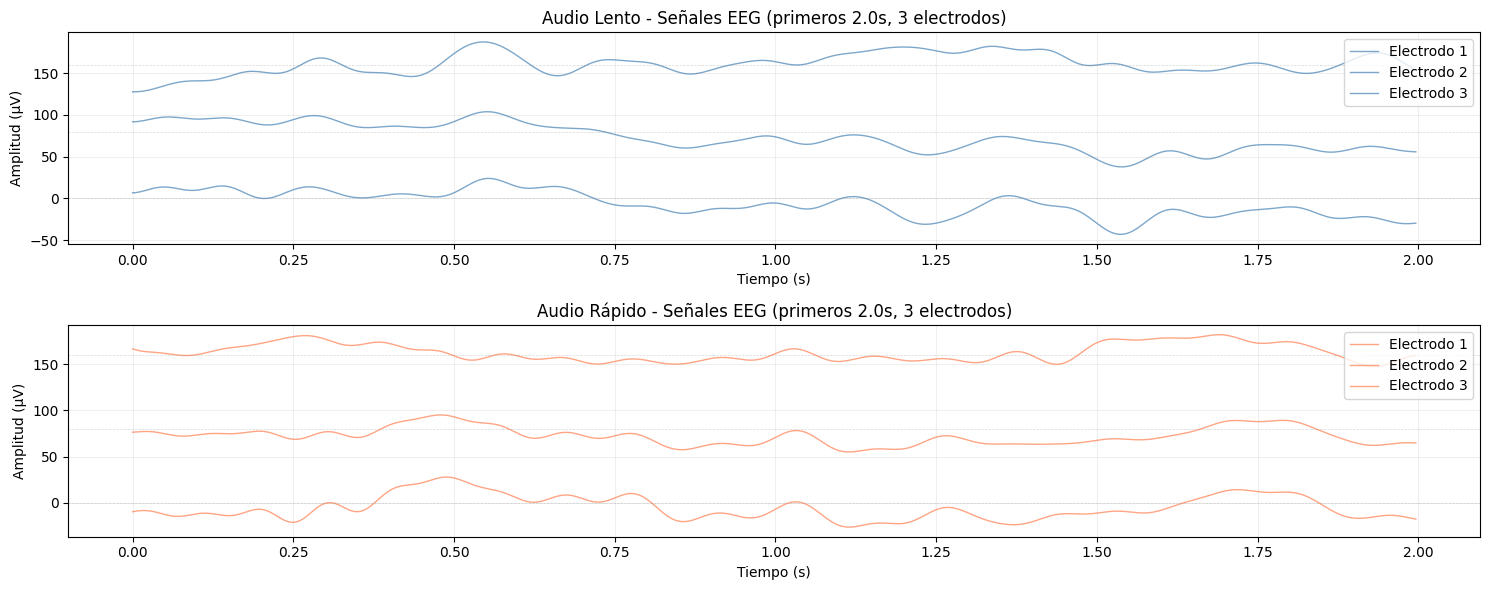

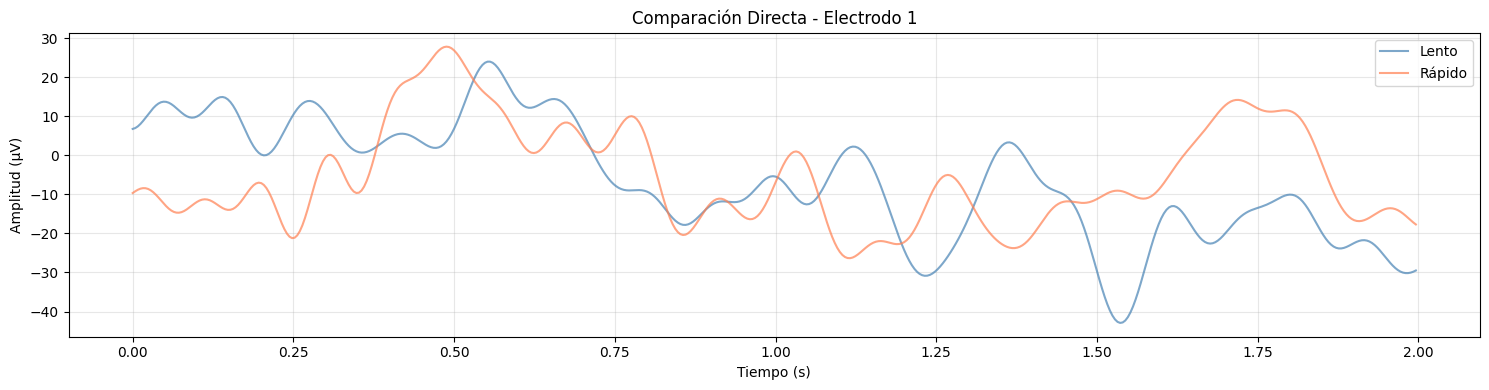

In [20]:
print(f"eeg_slow.shape = {eeg_slow.shape}")
print(f"Esperado: (65, n_muestras) donde n_muestras >> 65")

if eeg_slow.shape[0] > eeg_slow.shape[1]:
    print("Transponiendo datos...")
    eeg_slow = eeg_slow.T
    eeg_fast = eeg_fast.T
    print(f"Nueva forma: {eeg_slow.shape}")
else:
    print("Orientación correcta")

eeg_slow_good = eeg_slow[GOOD_ELECTRODES_PY, :]
eeg_fast_good = eeg_fast[GOOD_ELECTRODES_PY, :]

print(f"EEG original: {eeg_slow.shape}")
print(f"EEG buenos electrodos: {eeg_slow_good.shape}")
print(f"Removidos: {eeg_slow.shape[0] - eeg_slow_good.shape[0]} electrodos")

def check_calidad(data, nombre):
    print(f"\n{nombre}:")
    print(f"  NaN: {np.isnan(data).sum()}")
    print(f"  Min: {np.min(data):.6f}, Max: {np.max(data):.6f}")
    print(f"  Media: {np.mean(data):.6f}, Std: {np.std(data):.6f}")

check_calidad(eeg_slow_good, "EEG Lento")
check_calidad(eeg_fast_good, "EEG Rápido")
check_calidad(audio_slow, "Audio Lento")
check_calidad(audio_fast, "Audio Rápido")

duration_plot = 2  # Reducir a 2 segundos para ver mejor el detalle
n_channels_plot = 3  # Reducir a 3 electrodos

fig, axes = plt.subplots(2, 1, figsize=(15, 6))

def plot_eeg(ax, data, titulo, fs, color='blue'):
    samples = min(int(duration_plot * fs), data.shape[1])
    time = np.arange(samples) / fs
    
    for i in range(n_channels_plot):
        offset = i * 80
        ax.plot(time, data[i, :samples] + offset, label=f"Electrodo {i + 1}", 
                color=color, alpha=0.7, linewidth=1)
        ax.axhline(y=offset, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
    
    ax.set_title(f"{titulo} (primeros {samples / fs:.1f}s, {n_channels_plot} electrodos)")
    ax.set_xlabel("Tiempo (s)")
    ax.set_ylabel("Amplitud (μV)")
    ax.legend(loc='upper right')
    ax.grid(alpha=0.2)

plot_eeg(axes[0], eeg_slow_good, "Audio Lento - Señales EEG", Fs_eeg, 'steelblue')
plot_eeg(axes[1], eeg_fast_good, "Audio Rápido - Señales EEG", Fs_eeg, 'coral')

plt.tight_layout()
plt.show()

# Comparación de un solo electrodo superpuesto
fig, ax = plt.subplots(figsize=(15, 4))
electrode_compare = 0
samples = min(int(duration_plot * Fs_eeg), eeg_slow_good.shape[1], eeg_fast_good.shape[1])
time = np.arange(samples) / Fs_eeg

ax.plot(time, eeg_slow_good[electrode_compare, :samples], 
        label='Lento', color='steelblue', alpha=0.7, linewidth=1.5)
ax.plot(time, eeg_fast_good[electrode_compare, :samples], 
        label='Rápido', color='coral', alpha=0.7, linewidth=1.5)
ax.set_title(f"Comparación Directa - Electrodo {electrode_compare + 1}")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud (μV)")
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### Reproducción y Comparación de Audios


Audio Lento (velocidad normal):



Audio Rápido (acelerado):


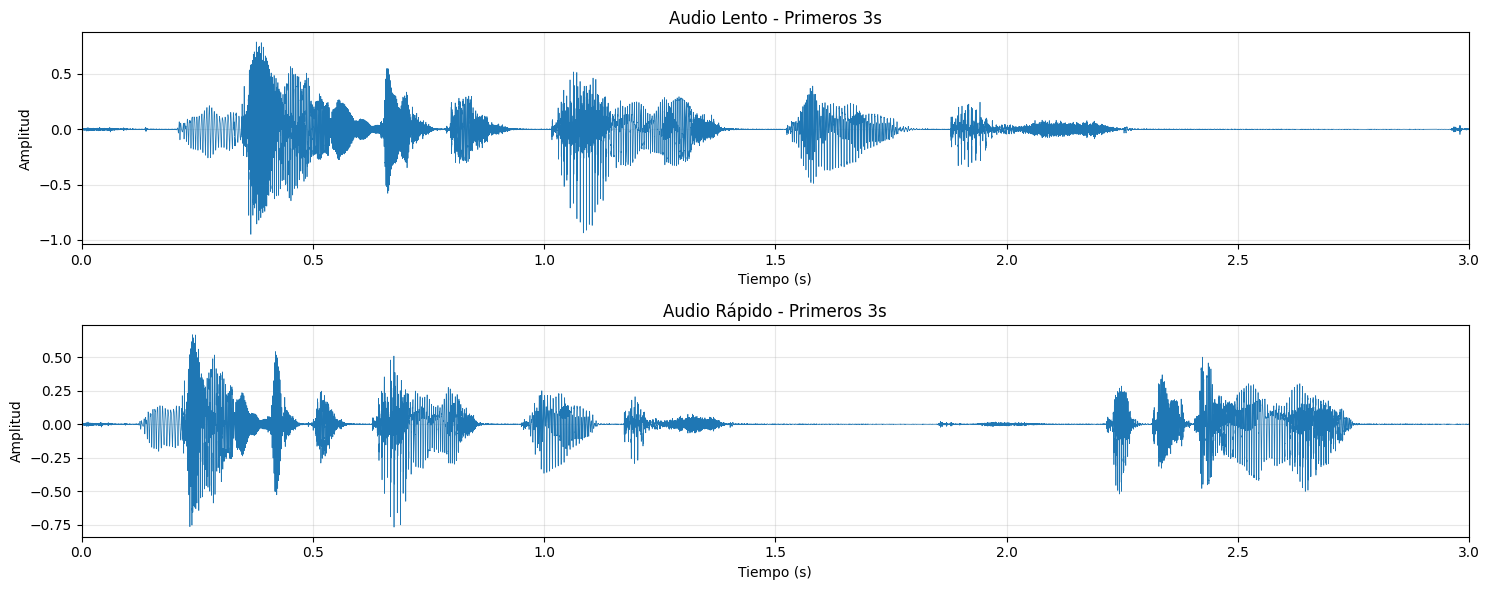


Duración total audio lento: 18.43 s
Duración total audio rápido: 11.52 s


In [4]:


# Reproducir audio lento
print("Audio Lento (velocidad normal):")
display(Audio(audio_slow[:, 0], rate=Fs_audio))

print("\nAudio Rápido (acelerado):")
display(Audio(audio_fast[:, 0], rate=Fs_audio))

# Visualización de forma de onda (primeros 3 segundos)
duration_to_plot = 3
samples_slow = int(duration_to_plot * Fs_audio)
samples_fast = int(duration_to_plot * Fs_audio)

time_slow = np.arange(samples_slow) / Fs_audio
time_fast = np.arange(samples_fast) / Fs_audio

audio_slow_mono = audio_slow[:, 0] if audio_slow.ndim > 1 else audio_slow
audio_fast_mono = audio_fast[:, 0] if audio_fast.ndim > 1 else audio_fast

fig, axes = plt.subplots(2, 1, figsize=(15, 6))

axes[0].plot(time_slow, audio_slow_mono[:samples_slow], linewidth=0.5)
axes[0].set_title(f"Audio Lento - Primeros {duration_to_plot}s")
axes[0].set_xlabel("Tiempo (s)")
axes[0].set_ylabel("Amplitud")
axes[0].set_xlim(0, duration_to_plot)
axes[0].grid(alpha=0.3)

axes[1].plot(time_fast, audio_fast_mono[:samples_fast], linewidth=0.5)
axes[1].set_title(f"Audio Rápido - Primeros {duration_to_plot}s")
axes[1].set_xlabel("Tiempo (s)")
axes[1].set_ylabel("Amplitud")
axes[1].set_xlim(0, duration_to_plot)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDuración total audio lento: {len(audio_slow) / Fs_audio:.2f} s")
print(f"Duración total audio rápido: {len(audio_fast) / Fs_audio:.2f} s")

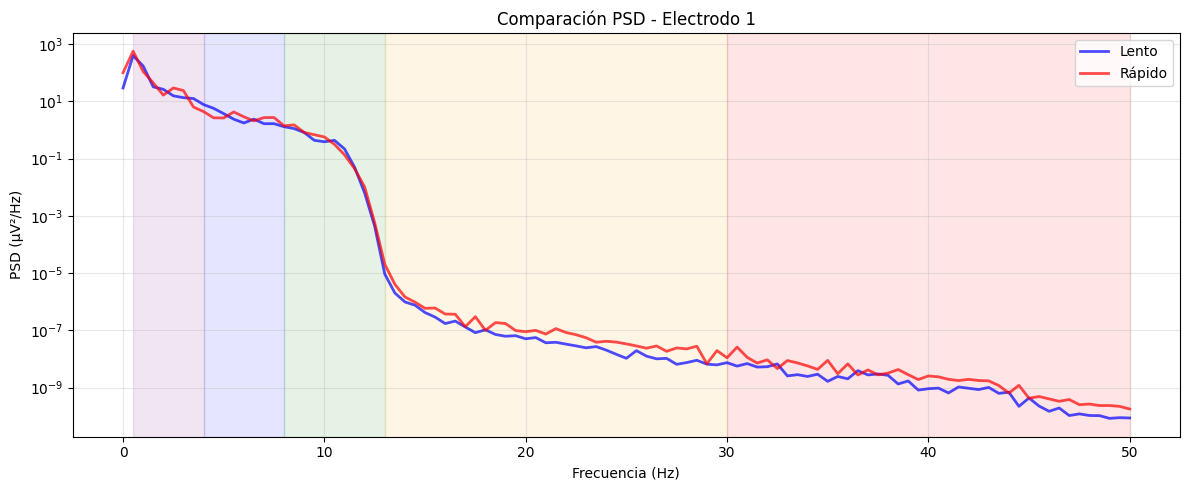

In [5]:
from scipy import signal

electrode_idx = 0

freqs_slow, psd_slow = signal.welch(
    eeg_slow_good[electrode_idx, :],
    fs=Fs_eeg,
    nperseg=min(2 * Fs_eeg, eeg_slow_good.shape[1])
)

freqs_fast, psd_fast = signal.welch(
    eeg_fast_good[electrode_idx, :],
    fs=Fs_eeg,
    nperseg=min(2 * Fs_eeg, eeg_fast_good.shape[1])
)

fig, ax = plt.subplots(figsize=(12, 5))
freq_mask = freqs_slow <= 50

# Bandas de frecuencia
bandas = [
    (0.5, 4, "purple", "Delta"),
    (4, 8, "blue", "Theta"),
    (8, 13, "green", "Alpha"),
    (13, 30, "orange", "Beta"),
    (30, 50, "red", "Gamma")
]

for inicio, fin, color, nombre in bandas:
    ax.axvspan(inicio, fin, alpha=0.1, color=color)

ax.semilogy(freqs_slow[freq_mask], psd_slow[freq_mask], 'b-', linewidth=2, label='Lento', alpha=0.7)
ax.semilogy(freqs_fast[freq_mask], psd_fast[freq_mask], 'r-', linewidth=2, label='Rápido', alpha=0.7)
ax.set_title(f"Comparación PSD - Electrodo {electrode_idx+1}")
ax.set_xlabel("Frecuencia (Hz)")
ax.set_ylabel("PSD (μV²/Hz)")
ax.grid(alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

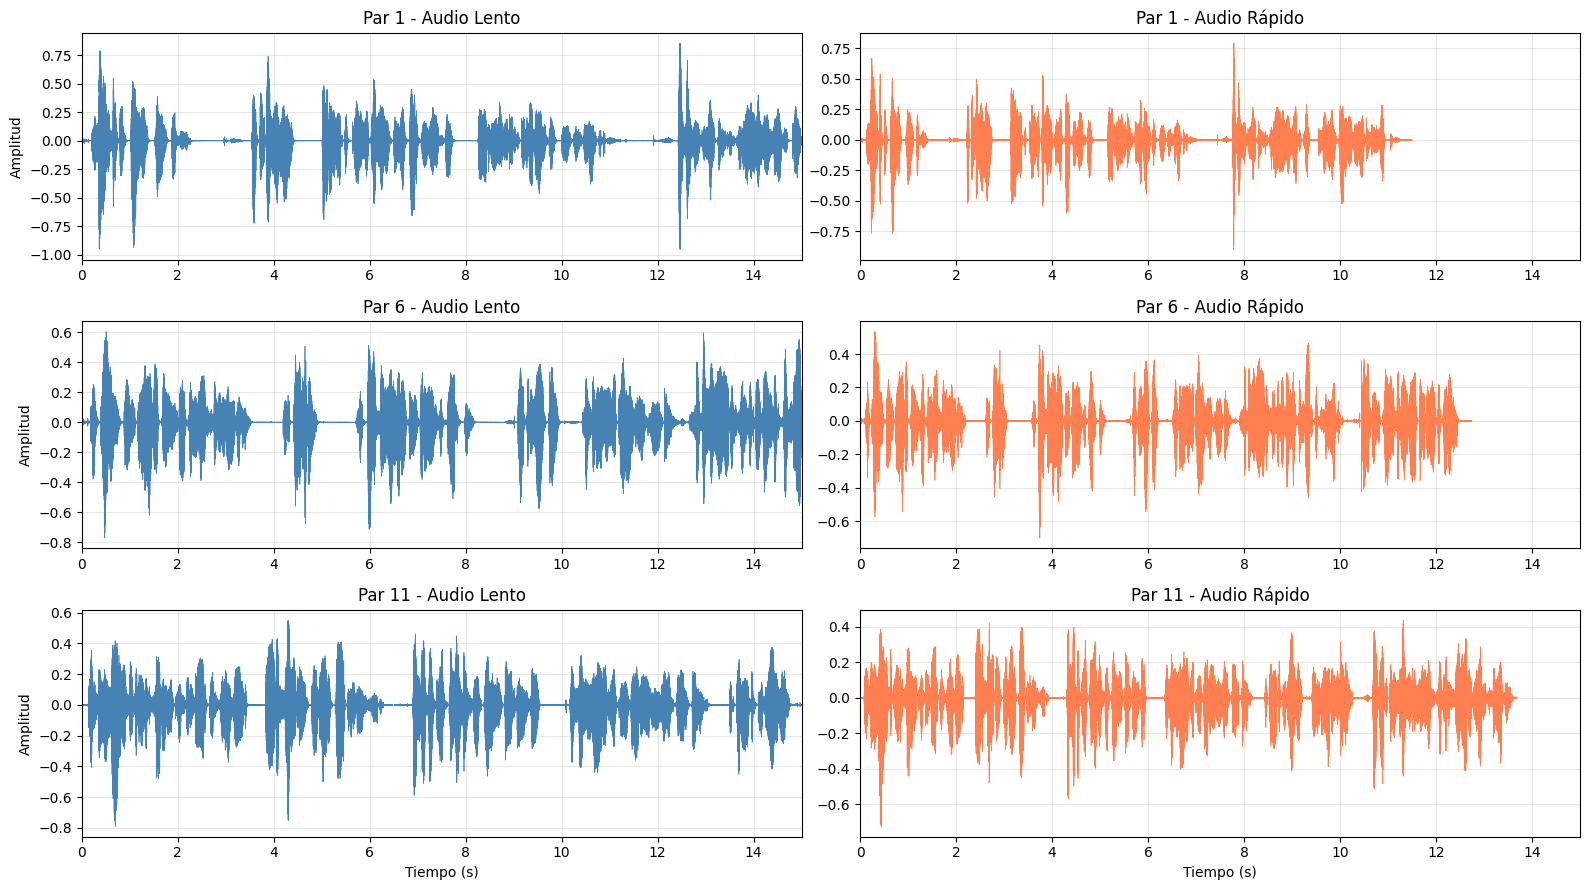

Cada fila muestra un par diferente de audio (slow-fast del mismo contenido)


In [6]:
# Comparar 3 pares diferentes de audios slow-fast
n_pairs = 3
pair_indices = [0, 5, 10]

fig, axes = plt.subplots(n_pairs, 2, figsize=(16, 3*n_pairs))

for idx, pair_idx in enumerate(pair_indices):
    # Cargar par slow-fast
    data_s = loadmat(slow_files[pair_idx])
    data_f = loadmat(fast_files[pair_idx])
    
    audio_s = data_s["y"][:, 0] if data_s["y"].ndim > 1 else data_s["y"]
    audio_f = data_f["y"][:, 0] if data_f["y"].ndim > 1 else data_f["y"]
   
    dur = 15  # Duración a graficar en segundos
    samples_s = min(int(dur * Fs_audio), len(audio_s))
    samples_f = min(int(dur * Fs_audio), len(audio_f))
    
    time_s = np.arange(samples_s) / Fs_audio
    time_f = np.arange(samples_f) / Fs_audio
    
    axes[idx, 0].plot(time_s, audio_s[:samples_s], linewidth=0.5, color='steelblue')
    axes[idx, 0].set_title(f"Par {pair_idx+1} - Audio Lento")
    axes[idx, 0].set_ylabel("Amplitud")
    axes[idx, 0].set_xlim(0, dur)
    axes[idx, 0].grid(alpha=0.3)
    
    axes[idx, 1].plot(time_f, audio_f[:samples_f], linewidth=0.5, color='coral')
    axes[idx, 1].set_title(f"Par {pair_idx+1} - Audio Rápido")
    axes[idx, 1].set_xlim(0, dur)
    axes[idx, 1].grid(alpha=0.3)
    
    if idx == n_pairs - 1:
        axes[idx, 0].set_xlabel("Tiempo (s)")
        axes[idx, 1].set_xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

print("Cada fila muestra un par diferente de audio (slow-fast del mismo contenido)")

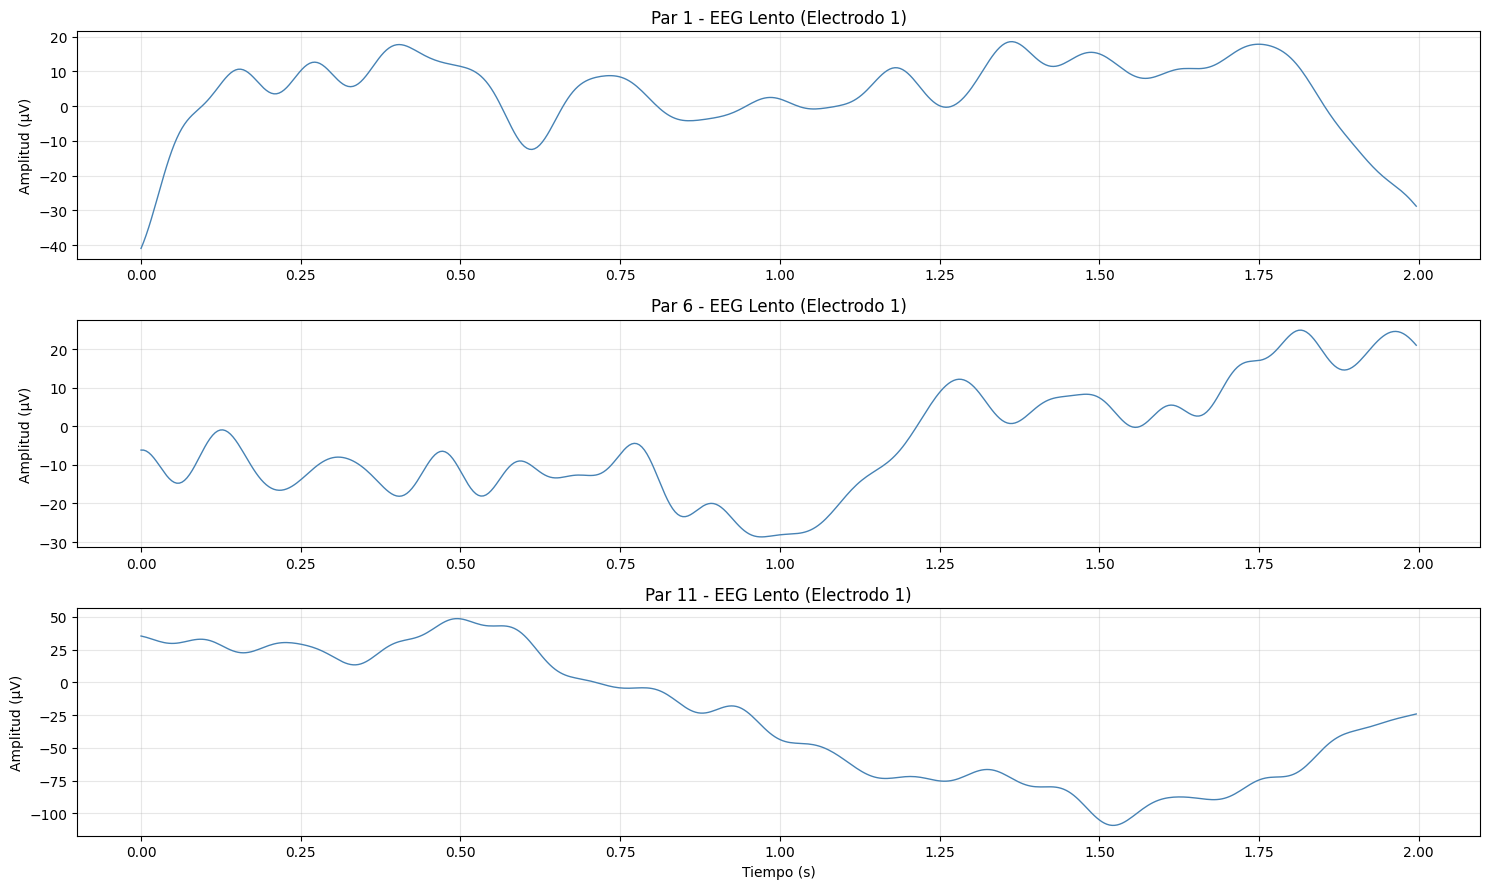

Cada gráfico muestra la señal EEG de un par diferente de audio (condición lenta)


In [7]:
# Comparar señales EEG de 3 pares diferentes (slow)
n_pairs_eeg = 3
pair_indices_eeg = [0, 5, 10]
electrode_to_plot = 0
dur_eeg = 2

fig, axes = plt.subplots(n_pairs_eeg, 1, figsize=(15, 3*n_pairs_eeg))

for idx, pair_idx in enumerate(pair_indices_eeg):
    # Cargar datos
    data_s = loadmat(slow_files[pair_idx])
    eeg_data = data_s["subeeg"]
    
    # Transponer si es necesario
    if eeg_data.shape[0] > eeg_data.shape[1]:
        eeg_data = eeg_data.T
    
    # Seleccionar buenos electrodos
    eeg_good = eeg_data[GOOD_ELECTRODES_PY, :]
    
    # Graficar
    samples = min(int(dur_eeg * Fs_eeg), eeg_good.shape[1])
    time = np.arange(samples) / Fs_eeg
    
    axes[idx].plot(time, eeg_good[electrode_to_plot, :samples], linewidth=1, color='steelblue')
    axes[idx].set_title(f"Par {pair_idx+1} - EEG Lento (Electrodo {electrode_to_plot+1})")
    axes[idx].set_ylabel("Amplitud (μV)")
    axes[idx].grid(alpha=0.3)
    
    if idx == n_pairs_eeg - 1:
        axes[idx].set_xlabel("Tiempo (s)")

plt.tight_layout()
plt.show()

print("Cada gráfico muestra la señal EEG de un par diferente de audio (condición lenta)")

## Variabilidad de Respuesta Cerebral: Slow vs Fast entre Pares


In [21]:
# Calcular potencia promedio en bandas de frecuencia para múltiples pares
n_pares_analizar = 20
bandas_freq = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 50)
}

resultados = {banda: {'slow': [], 'fast': []} for banda in bandas_freq.keys()}

for i in range(min(n_pares_analizar, len(slow_files), len(fast_files))):
    for condicion, archivos in [('slow', slow_files), ('fast', fast_files)]:
        data = loadmat(archivos[i])
        eeg = data["subeeg"]
        
        if eeg.shape[0] > eeg.shape[1]:
            eeg = eeg.T
        
        eeg_good = eeg[GOOD_ELECTRODES_PY, :]
        
        # Calcular PSD para el primer electrodo
        freqs, psd = signal.welch(eeg_good[0, :], fs=Fs_eeg, nperseg=min(2*Fs_eeg, eeg_good.shape[1]))
        
        # Calcular potencia en cada banda
        for banda, (f_min, f_max) in bandas_freq.items():
            mask = (freqs >= f_min) & (freqs <= f_max)
            potencia = np.mean(psd[mask])
            resultados[banda][condicion].append(potencia)

# Graficar comparación
fig, axes = plt.subplots(1, len(bandas_freq), figsize=(18, 4))

for idx, (banda, valores) in enumerate(resultados.items()):
    axes[idx].boxplot([valores['slow'], valores['fast']], labels=['Lento', 'Rápido'])
    axes[idx].set_title(f'Banda {banda}')
    axes[idx].set_ylabel('Potencia promedio (μV²/Hz)')
    axes[idx].grid(alpha=0.3)

plt.suptitle(f'Variabilidad de Potencia EEG entre {n_pares_analizar} Pares', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print(f"\nAnálisis de {n_pares_analizar} pares de audios (slow-fast)")
print("Esto muestra cómo varía la respuesta cerebral entre diferentes contenidos de audio")

NameError: name 'signal' is not defined

## Análisis Profundo de Variabilidad: Comparaciones Múltiples

Vamos a realizar un análisis exhaustivo comparando:

1. **Entre Electrodos**: Topografía espacial de la actividad cerebral
2. **Entre Bebés**: Variabilidad inter-sujeto
3. **Entre Condiciones**: Diferencias slow vs fast
4. **Entre Pares de Audio**: Respuesta a diferentes contenidos


In [22]:
# Preparación de datos para análisis comparativo exhaustivo
# Seleccionar muestra representativa para análisis detallado

# Seleccionar bebés (muestra de 10 para análisis detallado)
sample_size_babies = min(10, len(all_babies))
participants = sorted(all_babies)[:sample_size_babies]

# Seleccionar pares de audio comunes (audios que aparecen en ambas condiciones)
common_audios = []
for audio in all_audios_slow:
    if audio in all_audios_fast:
        # Contar cuántos bebés tienen este audio en ambas condiciones
        count = 0
        for baby in participants:
            if audio in slow_data.get(baby, []) and audio in fast_data.get(baby, []):
                count += 1
        if count >= 3:  # Al menos 3 bebés deben tener este audio
            common_audios.append(audio)

audio_pairs = sorted(common_audios)[:8]  # Tomar hasta 8 pares de audio

# Seleccionar electrodos (muestra representativa)
n_electrodes_sample = min(10, N_GOOD_ELECTRODES)
electrode_indices = np.linspace(0, N_GOOD_ELECTRODES-1, n_electrodes_sample, dtype=int)
selected_channels = [f"Ch{GOOD_ELECTRODES_MATLAB[i]}" for i in electrode_indices]

print(f"Muestra seleccionada para análisis detallado:")
print(f"  - Bebés: {len(participants)} → {participants}")
print(f"  - Pares de audio: {len(audio_pairs)} → {audio_pairs}")
print(f"  - Electrodos: {len(selected_channels)} → {selected_channels}")
print(f"  - Total combinaciones: {len(participants) * len(audio_pairs) * 2 * len(selected_channels)}")

# Cargar y organizar datos en estructura conveniente
print("\nCargando datos EEG...")
eeg_data = {}

for participant in participants:
    for pair in audio_pairs:
        for condition, files in [('slow', slow_files), ('fast', fast_files)]:
            # Buscar archivo correspondiente
            filename = f"{participant}_{pair}"
            matching_files = [f for f in files if f.stem == filename]
            
            if matching_files:
                filepath = matching_files[0]
                try:
                    data = loadmat(filepath)
                    eeg = data["subeeg"]
                    
                    # Transponer si necesario
                    if eeg.shape[0] > eeg.shape[1]:
                        eeg = eeg.T
                    
                    # Seleccionar buenos electrodos
                    eeg_good = eeg[GOOD_ELECTRODES_PY, :]
                    
                    # Guardar cada electrodo por separado
                    for idx, ch_name in zip(electrode_indices, selected_channels):
                        key = f"{participant}_{pair}_{condition}_{ch_name}"
                        eeg_data[key] = {
                            'signal': eeg_good[idx, :],
                            'participant': participant,
                            'pair': pair,
                            'condition': condition,
                            'electrode': ch_name
                        }
                except Exception as e:
                    print(f"  Error cargando {filename}: {e}")

print(f"\nDatos cargados: {len(eeg_data)} señales EEG")
print(f"Tamaño promedio de señal: {np.mean([len(d['signal']) for d in eeg_data.values() if d['signal'] is not None]):.0f} muestras")
print("\n¡Listo para análisis comparativo!")

Muestra seleccionada para análisis detallado:
  - Bebés: 10 → ['bb01', 'bb02', 'bb04', 'bb05', 'bb09', 'bb12', 'bb13', 'bb14', 'bb15', 'bb17']
  - Pares de audio: 8 → ['ut01', 'ut02', 'ut03', 'ut04', 'ut05', 'ut06', 'ut07', 'ut08']
  - Electrodos: 10 → ['Ch2', 'Ch9', 'Ch15', 'Ch21', 'Ch27', 'Ch34', 'Ch42', 'Ch49', 'Ch54', 'Ch65']
  - Total combinaciones: 1600

Cargando datos EEG...

Datos cargados: 1230 señales EEG
Tamaño promedio de señal: 4322 muestras

¡Listo para análisis comparativo!


/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/1177168346.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([electrode_power[i, :] for i in range(len(selected_channels))],
/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/1177168346.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([electrode_power[i, :] for i in range(len(selected_channels))],


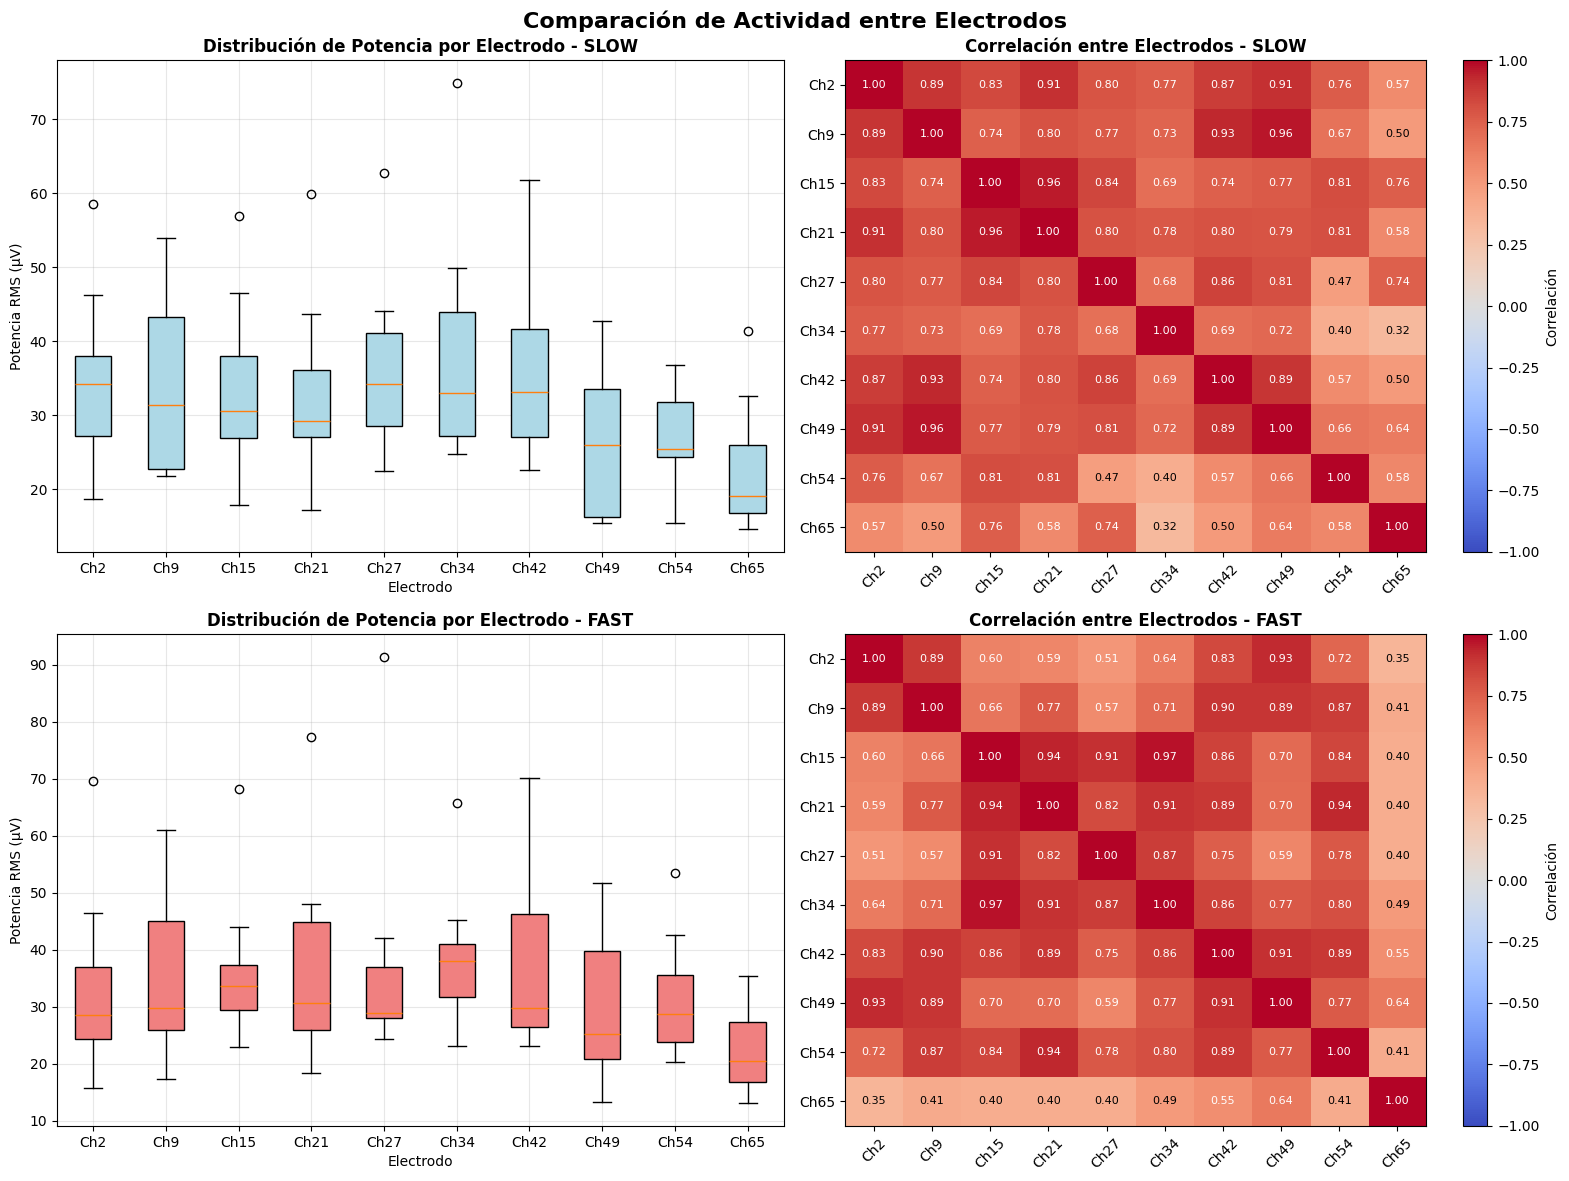


ANÁLISIS POR ELECTRODO

SLOW:
Electrodo     Media       Std       Min        Max        CV
      Ch2 33.867786 14.429999 12.208089  77.244263 42.606857
      Ch9 32.927452 15.926753 13.215832 100.284004 48.369225
     Ch15 32.349205 13.648377 11.580031  83.461174 42.190765
     Ch21 31.712084 13.207537 11.777504  75.684837 41.648277
     Ch27 34.738480 16.886461 14.272109 121.486534 48.610249
     Ch34 36.648666 16.680876 16.252682  85.354332 45.515640
     Ch42 35.278599 15.088546 15.273158  83.893463 42.769684
     Ch49 25.332623 12.854507  9.897843  65.681992 50.742901
     Ch54 26.952475  9.205508  7.935873  54.541260 34.154594
     Ch65 21.823156 11.713056  8.342401  77.956093 53.672600

Electrodo más activo: Ch34
Electrodo más estable: Ch54

FAST:
Electrodo     Media       Std       Min        Max        CV
      Ch2 32.939224 16.823988 12.151440  79.865761 51.075848
      Ch9 34.536289 16.660563 11.472890  85.005165 48.240742
     Ch15 34.647884 15.211805 15.008758  77.320496 4

In [23]:
# 1. COMPARACIÓN ENTRE ELECTRODOS - Topografía de la Actividad
# Calcular potencia promedio por electrodo

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Actividad entre Electrodos', fontsize=16, fontweight='bold')

# Para cada condición
for idx, condition in enumerate(['slow', 'fast']):
    # Matriz de potencia: electrodos x bebés
    electrode_power = np.zeros((len(selected_channels), len(participants)))
    
    for p_idx, participant in enumerate(participants):
        for e_idx, electrode in enumerate(selected_channels):
            channel_data = []
            for pair in audio_pairs:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    # Potencia RMS
                    channel_data.append(np.sqrt(np.mean(signal**2)))
            
            if channel_data:
                electrode_power[e_idx, p_idx] = np.mean(channel_data)
    
    # Boxplot por electrodo
    ax = axes[idx, 0]
    bp = ax.boxplot([electrode_power[i, :] for i in range(len(selected_channels))], 
                     labels=selected_channels, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue' if condition == 'slow' else 'lightcoral')
    ax.set_title(f'Distribución de Potencia por Electrodo - {condition.upper()}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Electrodo')
    ax.set_ylabel('Potencia RMS (µV)')
    ax.grid(True, alpha=0.3)
    
    # Heatmap de correlación entre electrodos
    ax = axes[idx, 1]
    corr_matrix = np.corrcoef(electrode_power)
    im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
    ax.set_xticks(range(len(selected_channels)))
    ax.set_yticks(range(len(selected_channels)))
    ax.set_xticklabels(selected_channels, rotation=45)
    ax.set_yticklabels(selected_channels)
    ax.set_title(f'Correlación entre Electrodos - {condition.upper()}', fontsize=12, fontweight='bold')
    plt.colorbar(im, ax=ax, label='Correlación')
    
    # Añadir valores de correlación
    for i in range(len(selected_channels)):
        for j in range(len(selected_channels)):
            text = ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                          ha="center", va="center", color="black" if abs(corr_matrix[i, j]) < 0.5 else "white",
                          fontsize=8)

plt.tight_layout()
plt.show()

# Resumen estadístico por electrodo
print("\n" + "="*80)
print("ANÁLISIS POR ELECTRODO")
print("="*80)
for condition in ['slow', 'fast']:
    print(f"\n{condition.upper()}:")
    electrode_stats = []
    for electrode in selected_channels:
        powers = []
        for participant in participants:
            for pair in audio_pairs:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    powers.append(np.sqrt(np.mean(signal**2)))
        
        if powers:
            electrode_stats.append({
                'Electrodo': electrode,
                'Media': np.mean(powers),
                'Std': np.std(powers),
                'Min': np.min(powers),
                'Max': np.max(powers),
                'CV': np.std(powers)/np.mean(powers)*100
            })
    
    df_stats = pd.DataFrame(electrode_stats)
    print(df_stats.to_string(index=False))
    print(f"\nElectrodo más activo: {df_stats.loc[df_stats['Media'].idxmax(), 'Electrodo']}")
    print(f"Electrodo más estable: {df_stats.loc[df_stats['CV'].idxmin(), 'Electrodo']}")

/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/1874533974.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


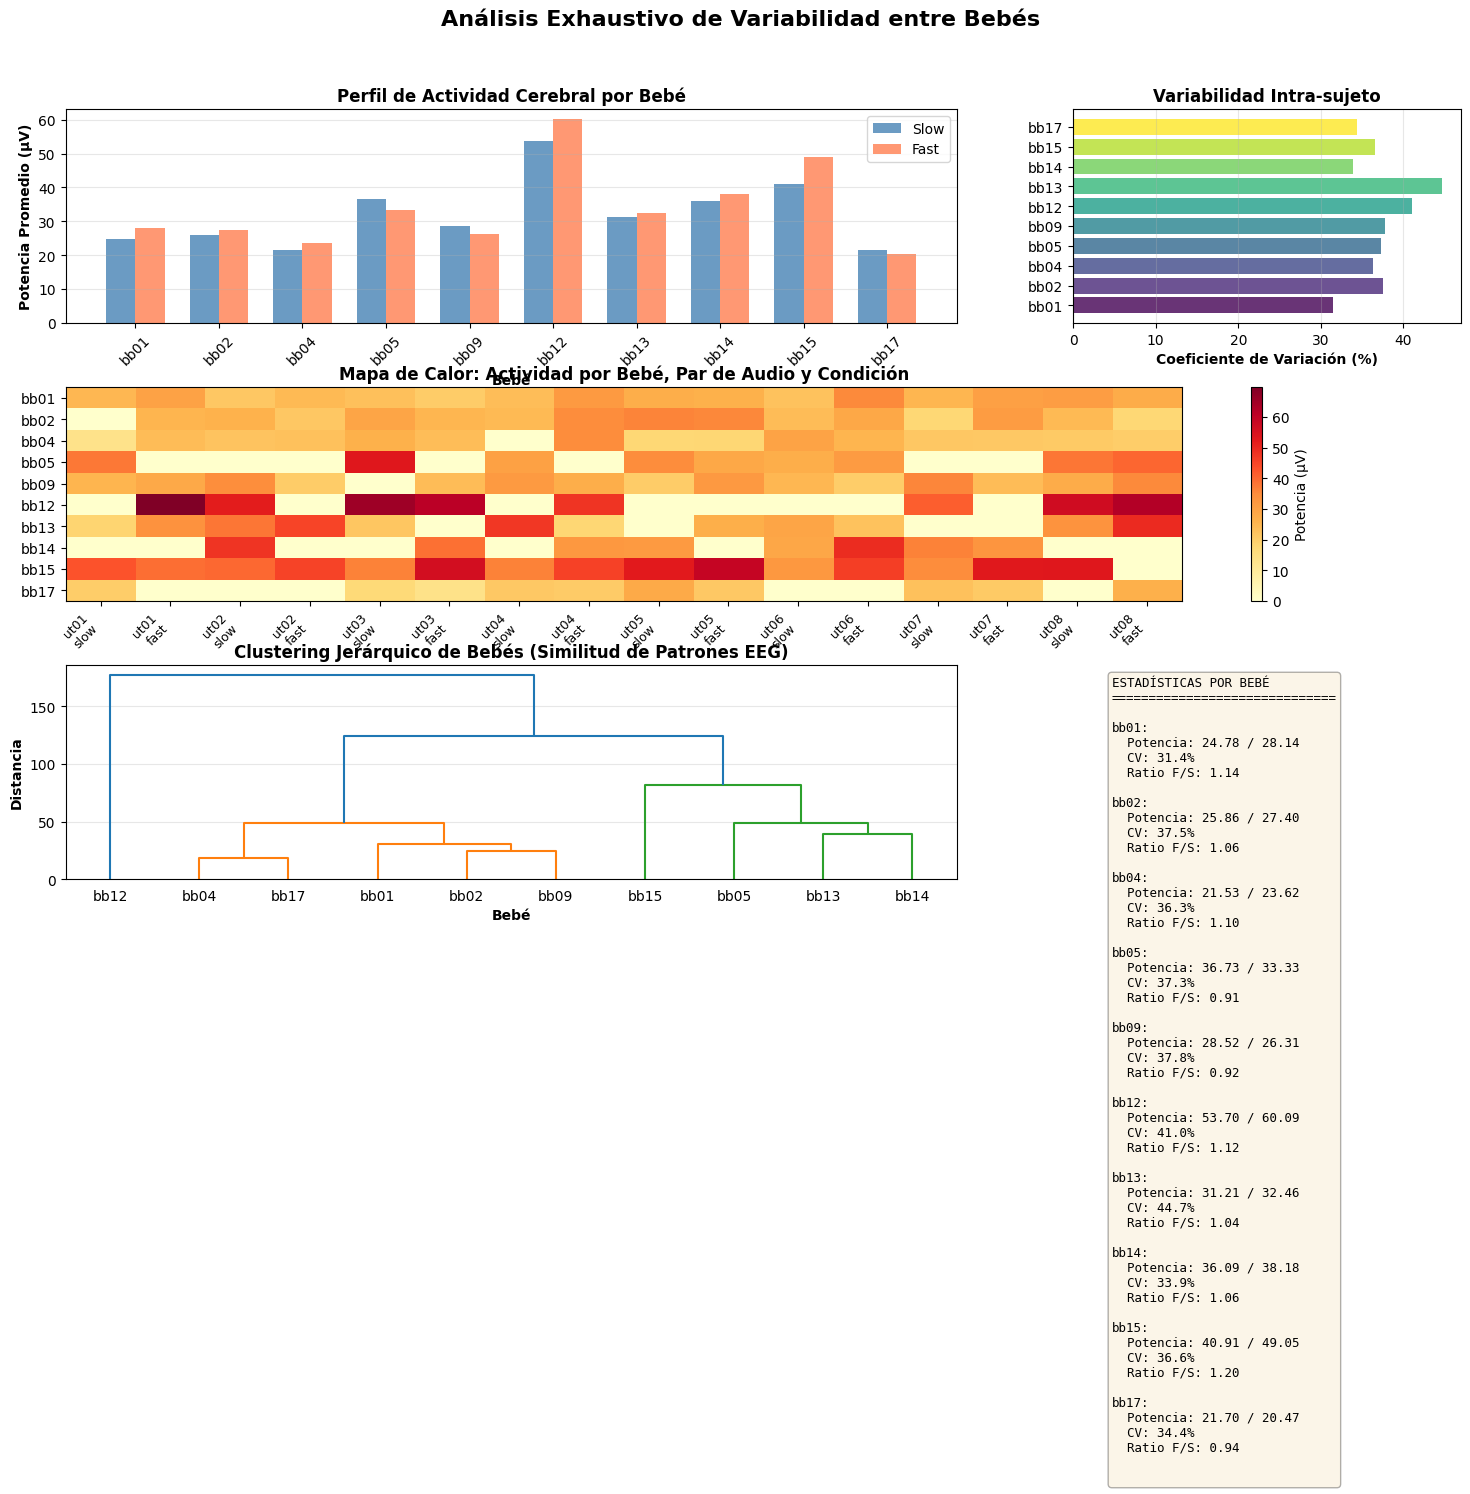


ANÁLISIS DETALLADO POR BEBÉ
Bebé  Potencia Slow  Potencia Fast  Diferencia (F-S)  Ratio (F/S)    CV (%)
bb01      24.780422      28.141510          3.361088     1.135635 31.426495
bb02      25.861582      27.398663          1.537081     1.059435 37.477093
bb04      21.528938      23.615688          2.086750     1.096928 36.282932
bb05      36.729046      33.331905         -3.397141     0.907508 37.262714
bb09      28.523884      26.307667         -2.216217     0.922303 37.760677
bb12      53.698936      60.088245          6.389309     1.118984 41.038940
bb13      31.205069      32.464504          1.259436     1.040360 44.690594
bb14      36.086536      38.184731          2.098194     1.058143 33.903522
bb15      40.905128      49.047451          8.142323     1.199054 36.607212
bb17      21.695490      20.466099         -1.229391     0.943334 34.412266

Bebé con mayor actividad: bb12
Bebé con mayor diferencia slow-fast: bb15
Bebé más consistente (menor CV): bb01


In [24]:
# 2. COMPARACIÓN ENTRE BEBÉS - Variabilidad Inter-sujeto

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('Análisis Exhaustivo de Variabilidad entre Bebés', fontsize=16, fontweight='bold')

# 2.1 Perfil de potencia por bebé
ax1 = fig.add_subplot(gs[0, :2])
baby_profiles = {condition: [] for condition in ['slow', 'fast']}
baby_labels = []

for participant in participants:
    baby_power = {condition: [] for condition in ['slow', 'fast']}
    for condition in ['slow', 'fast']:
        for pair in audio_pairs:
            for electrode in selected_channels:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    baby_power[condition].append(np.sqrt(np.mean(signal**2)))
    
    for condition in ['slow', 'fast']:
        if baby_power[condition]:
            baby_profiles[condition].append(np.mean(baby_power[condition]))
    baby_labels.append(participant)

x = np.arange(len(baby_labels))
width = 0.35
ax1.bar(x - width/2, baby_profiles['slow'], width, label='Slow', color='steelblue', alpha=0.8)
ax1.bar(x + width/2, baby_profiles['fast'], width, label='Fast', color='coral', alpha=0.8)
ax1.set_xlabel('Bebé', fontweight='bold')
ax1.set_ylabel('Potencia Promedio (µV)', fontweight='bold')
ax1.set_title('Perfil de Actividad Cerebral por Bebé', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(baby_labels, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2.2 Variabilidad intra-sujeto (coeficiente de variación)
ax2 = fig.add_subplot(gs[0, 2])
baby_cv = []
for participant in participants:
    all_powers = []
    for condition in ['slow', 'fast']:
        for pair in audio_pairs:
            for electrode in selected_channels:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    all_powers.append(np.sqrt(np.mean(signal**2)))
    
    if all_powers:
        cv = np.std(all_powers) / np.mean(all_powers) * 100
        baby_cv.append(cv)

colors = plt.cm.viridis(np.linspace(0, 1, len(baby_labels)))
bars = ax2.barh(baby_labels, baby_cv, color=colors, alpha=0.8)
ax2.set_xlabel('Coeficiente de Variación (%)', fontweight='bold')
ax2.set_title('Variabilidad Intra-sujeto', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 2.3 Heatmap de actividad por bebé y condición
ax3 = fig.add_subplot(gs[1, :])
baby_condition_matrix = np.zeros((len(participants), len(audio_pairs) * 2))
labels_x = []

for p_idx, participant in enumerate(participants):
    col_idx = 0
    for pair in audio_pairs:
        for condition in ['slow', 'fast']:
            powers = []
            for electrode in selected_channels:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    powers.append(np.sqrt(np.mean(signal**2)))
            
            if powers:
                baby_condition_matrix[p_idx, col_idx] = np.mean(powers)
            
            if p_idx == 0:
                labels_x.append(f"{pair}\n{condition}")
            col_idx += 1

im = ax3.imshow(baby_condition_matrix, cmap='YlOrRd', aspect='auto')
ax3.set_xticks(range(len(labels_x)))
ax3.set_xticklabels(labels_x, rotation=45, ha='right', fontsize=9)
ax3.set_yticks(range(len(participants)))
ax3.set_yticklabels(participants)
ax3.set_title('Mapa de Calor: Actividad por Bebé, Par de Audio y Condición', fontweight='bold')
plt.colorbar(im, ax=ax3, label='Potencia (µV)')

# 2.4 Clustering jerárquico de bebés
ax4 = fig.add_subplot(gs[2, :2])
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Crear matriz de características por bebé
baby_features = []
for participant in participants:
    features = []
    for condition in ['slow', 'fast']:
        for electrode in selected_channels:
            electrode_powers = []
            for pair in audio_pairs:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    electrode_powers.append(np.sqrt(np.mean(signal**2)))
            features.append(np.mean(electrode_powers) if electrode_powers else 0)
    baby_features.append(features)

baby_features = np.array(baby_features)
linkage_matrix = linkage(baby_features, method='ward')
dendrogram(linkage_matrix, labels=participants, ax=ax4, leaf_font_size=10)
ax4.set_title('Clustering Jerárquico de Bebés (Similitud de Patrones EEG)', fontweight='bold')
ax4.set_xlabel('Bebé', fontweight='bold')
ax4.set_ylabel('Distancia', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# 2.5 Estadísticas comparativas
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')

stats_text = "ESTADÍSTICAS POR BEBÉ\n" + "="*30 + "\n\n"
for i, participant in enumerate(participants):
    stats_text += f"{participant}:\n"
    stats_text += f"  Potencia: {baby_profiles['slow'][i]:.2f} / {baby_profiles['fast'][i]:.2f}\n"
    stats_text += f"  CV: {baby_cv[i]:.1f}%\n"
    stats_text += f"  Ratio F/S: {baby_profiles['fast'][i]/baby_profiles['slow'][i]:.2f}\n\n"

ax5.text(0.1, 0.95, stats_text, transform=ax5.transAxes, fontsize=9,
         verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

# Resumen estadístico detallado
print("\n" + "="*80)
print("ANÁLISIS DETALLADO POR BEBÉ")
print("="*80)
baby_summary = []
for i, participant in enumerate(participants):
    baby_summary.append({
        'Bebé': participant,
        'Potencia Slow': baby_profiles['slow'][i],
        'Potencia Fast': baby_profiles['fast'][i],
        'Diferencia (F-S)': baby_profiles['fast'][i] - baby_profiles['slow'][i],
        'Ratio (F/S)': baby_profiles['fast'][i] / baby_profiles['slow'][i] if baby_profiles['slow'][i] > 0 else np.nan,
        'CV (%)': baby_cv[i]
    })

df_baby = pd.DataFrame(baby_summary)
print(df_baby.to_string(index=False))
print(f"\nBebé con mayor actividad: {df_baby.loc[df_baby['Potencia Slow'].idxmax(), 'Bebé']}")
print(f"Bebé con mayor diferencia slow-fast: {df_baby.loc[df_baby['Diferencia (F-S)'].idxmax(), 'Bebé']}")
print(f"Bebé más consistente (menor CV): {df_baby.loc[df_baby['CV (%)'].idxmin(), 'Bebé']}")

/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/1515222809.py:219: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


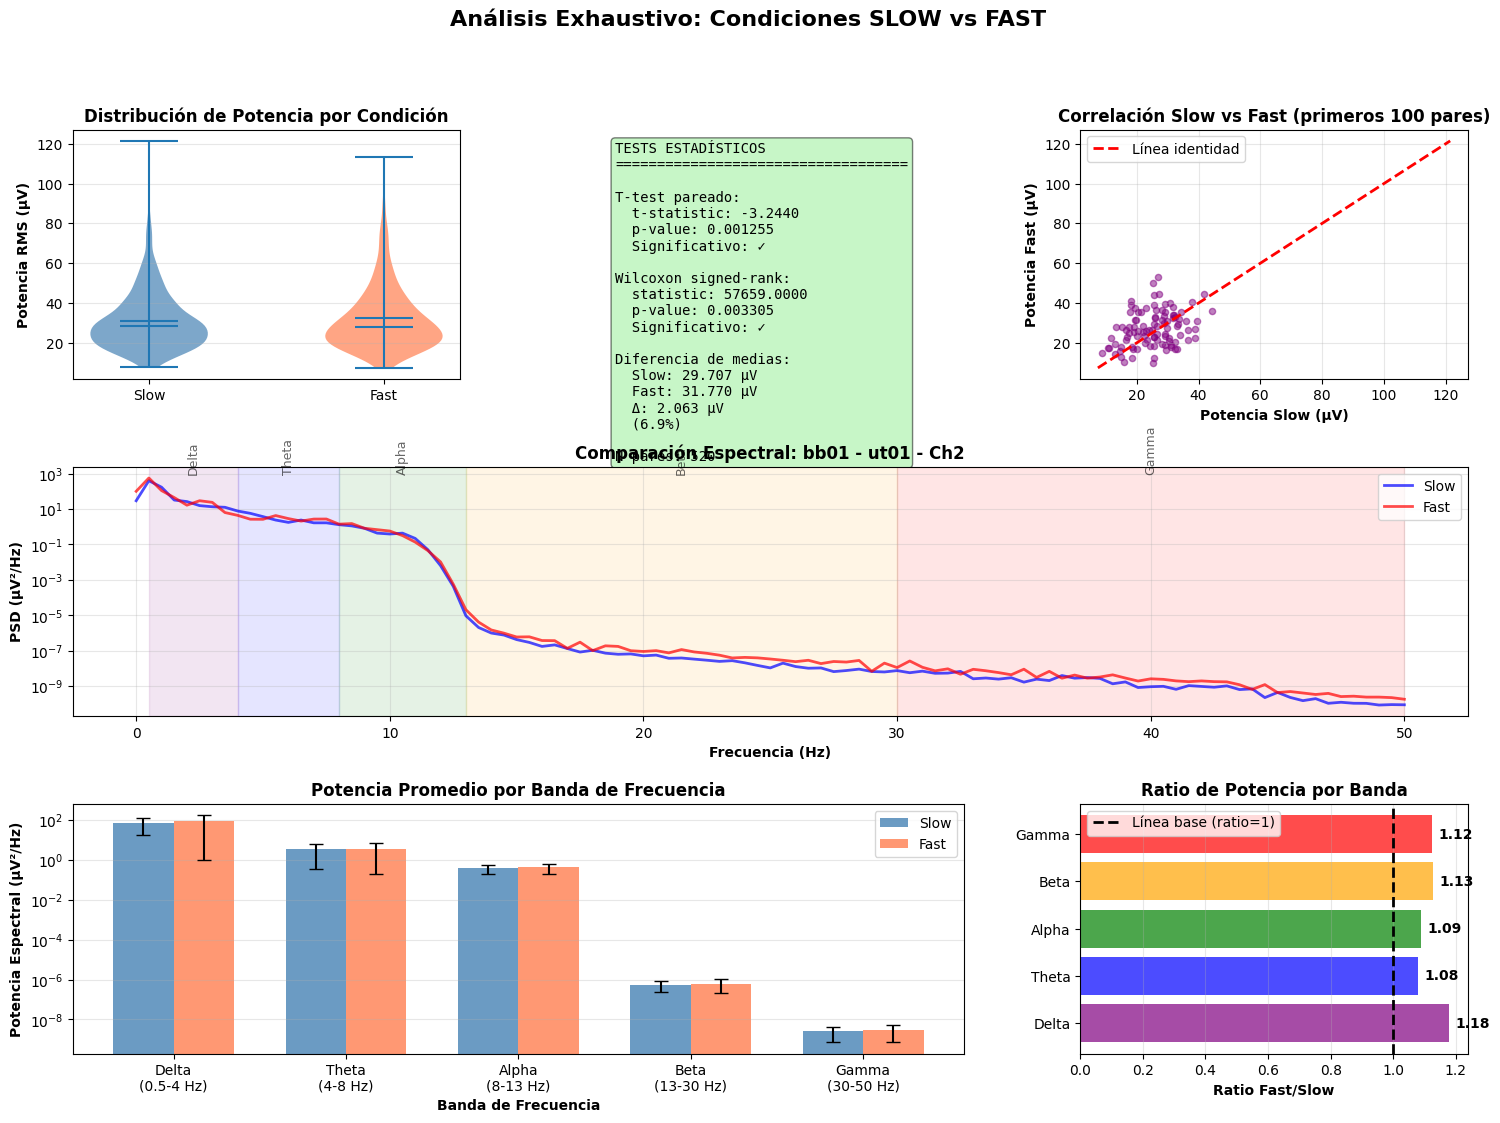


ANÁLISIS POR BANDA DE FRECUENCIA

Delta
(0.5-4 Hz):
  Slow - Media: 7.5942e+01, Std: 5.8522e+01
  Fast - Media: 8.9537e+01, Std: 8.8580e+01
  Ratio (Fast/Slow): 1.179

Theta
(4-8 Hz):
  Slow - Media: 3.4335e+00, Std: 3.0667e+00
  Fast - Media: 3.7040e+00, Std: 3.5007e+00
  Ratio (Fast/Slow): 1.079

Alpha
(8-13 Hz):
  Slow - Media: 3.8709e-01, Std: 1.8852e-01
  Fast - Media: 4.2162e-01, Std: 2.2942e-01
  Ratio (Fast/Slow): 1.089

Beta
(13-30 Hz):
  Slow - Media: 5.5144e-07, Std: 3.0900e-07
  Fast - Media: 6.2136e-07, Std: 4.0655e-07
  Ratio (Fast/Slow): 1.127

Gamma
(30-50 Hz):
  Slow - Media: 2.5707e-09, Std: 1.8157e-09
  Fast - Media: 2.8870e-09, Std: 2.1645e-09
  Ratio (Fast/Slow): 1.123


In [25]:
# 3. COMPARACIÓN ENTRE CONDICIONES (SLOW vs FAST) - Análisis Exhaustivo

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

fig.suptitle('Análisis Exhaustivo: Condiciones SLOW vs FAST', fontsize=16, fontweight='bold')

# 3.1 Comparación de distribuciones de potencia
ax1 = fig.add_subplot(gs[0, 0])
slow_powers = []
fast_powers = []

for participant in participants:
    for pair in audio_pairs:
        for electrode in selected_channels:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            if slow_key in eeg_data and eeg_data[slow_key]['signal'] is not None:
                signal = eeg_data[slow_key]['signal']
                slow_powers.append(np.sqrt(np.mean(signal**2)))
            
            if fast_key in eeg_data and eeg_data[fast_key]['signal'] is not None:
                signal = eeg_data[fast_key]['signal']
                fast_powers.append(np.sqrt(np.mean(signal**2)))

parts = ax1.violinplot([slow_powers, fast_powers], positions=[1, 2], 
                        showmeans=True, showmedians=True)
for pc, color in zip(parts['bodies'], ['steelblue', 'coral']):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax1.set_xticks([1, 2])
ax1.set_xticklabels(['Slow', 'Fast'])
ax1.set_ylabel('Potencia RMS (µV)', fontweight='bold')
ax1.set_title('Distribución de Potencia por Condición', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# 3.2 Test estadístico
from scipy.stats import ttest_rel, wilcoxon
ax2 = fig.add_subplot(gs[0, 1])
ax2.axis('off')

# Crear pares para test pareado
paired_slow = []
paired_fast = []
for participant in participants:
    for pair in audio_pairs:
        for electrode in selected_channels:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            if (slow_key in eeg_data and eeg_data[slow_key]['signal'] is not None and
                fast_key in eeg_data and eeg_data[fast_key]['signal'] is not None):
                
                slow_signal = eeg_data[slow_key]['signal']
                fast_signal = eeg_data[fast_key]['signal']
                
                paired_slow.append(np.sqrt(np.mean(slow_signal**2)))
                paired_fast.append(np.sqrt(np.mean(fast_signal**2)))

if len(paired_slow) > 0:
    t_stat, t_pval = ttest_rel(paired_slow, paired_fast)
    w_stat, w_pval = wilcoxon(paired_slow, paired_fast)
    
    stats_text = "TESTS ESTADÍSTICOS\n"
    stats_text += "="*35 + "\n\n"
    stats_text += f"T-test pareado:\n"
    stats_text += f"  t-statistic: {t_stat:.4f}\n"
    stats_text += f"  p-value: {t_pval:.6f}\n"
    stats_text += f"  Significativo: {'✓' if t_pval < 0.05 else '✗'}\n\n"
    stats_text += f"Wilcoxon signed-rank:\n"
    stats_text += f"  statistic: {w_stat:.4f}\n"
    stats_text += f"  p-value: {w_pval:.6f}\n"
    stats_text += f"  Significativo: {'✓' if w_pval < 0.05 else '✗'}\n\n"
    stats_text += f"Diferencia de medias:\n"
    stats_text += f"  Slow: {np.mean(paired_slow):.3f} µV\n"
    stats_text += f"  Fast: {np.mean(paired_fast):.3f} µV\n"
    stats_text += f"  Δ: {np.mean(paired_fast) - np.mean(paired_slow):.3f} µV\n"
    stats_text += f"  ({(np.mean(paired_fast) - np.mean(paired_slow))/np.mean(paired_slow)*100:.1f}%)\n\n"
    stats_text += f"N pares: {len(paired_slow)}"
    
    ax2.text(0.1, 0.95, stats_text, transform=ax2.transAxes, fontsize=10,
             verticalalignment='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgreen' if t_pval < 0.05 else 'lightyellow', alpha=0.5))

# 3.3 Scatter plot pareado
ax3 = fig.add_subplot(gs[0, 2])
ax3.scatter(paired_slow[:100], paired_fast[:100], alpha=0.5, s=20, color='purple')
min_val = min(min(paired_slow), min(paired_fast))
max_val = max(max(paired_slow), max(paired_fast))
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Línea identidad')
ax3.set_xlabel('Potencia Slow (µV)', fontweight='bold')
ax3.set_ylabel('Potencia Fast (µV)', fontweight='bold')
ax3.set_title('Correlación Slow vs Fast (primeros 100 pares)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 3.4 Análisis espectral comparativo
ax4 = fig.add_subplot(gs[1, :])
from scipy import signal as sig

# Seleccionar un ejemplo representativo
example_participant = participants[0]
example_pair = audio_pairs[0]
example_electrode = selected_channels[0]

slow_key = f"{example_participant}_{example_pair}_slow_{example_electrode}"
fast_key = f"{example_participant}_{example_pair}_fast_{example_electrode}"

if slow_key in eeg_data and fast_key in eeg_data:
    slow_signal = eeg_data[slow_key]['signal']
    fast_signal = eeg_data[fast_key]['signal']
    
    freqs_slow, psd_slow = sig.welch(slow_signal, fs=Fs_eeg, nperseg=min(2*Fs_eeg, len(slow_signal)))
    freqs_fast, psd_fast = sig.welch(fast_signal, fs=Fs_eeg, nperseg=min(2*Fs_eeg, len(fast_signal)))
    
    freq_mask = freqs_slow <= 50
    
    ax4.semilogy(freqs_slow[freq_mask], psd_slow[freq_mask], 'b-', linewidth=2, 
                 label='Slow', alpha=0.7)
    ax4.semilogy(freqs_fast[freq_mask], psd_fast[freq_mask], 'r-', linewidth=2, 
                 label='Fast', alpha=0.7)
    
    # Bandas de frecuencia
    bandas = [
        (0.5, 4, "purple", "Delta"),
        (4, 8, "blue", "Theta"),
        (8, 13, "green", "Alpha"),
        (13, 30, "orange", "Beta"),
        (30, 50, "red", "Gamma")
    ]
    
    for inicio, fin, color, nombre in bandas:
        ax4.axvspan(inicio, fin, alpha=0.1, color=color)
        ax4.text((inicio+fin)/2, ax4.get_ylim()[1]*0.5, nombre, 
                ha='center', fontsize=9, rotation=90, alpha=0.6)
    
    ax4.set_xlabel('Frecuencia (Hz)', fontweight='bold')
    ax4.set_ylabel('PSD (µV²/Hz)', fontweight='bold')
    ax4.set_title(f'Comparación Espectral: {example_participant} - {example_pair} - {example_electrode}', 
                  fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

# 3.5 Potencia por banda de frecuencia
ax5 = fig.add_subplot(gs[2, :2])
bandas_freq = {
    'Delta\n(0.5-4 Hz)': (0.5, 4),
    'Theta\n(4-8 Hz)': (4, 8),
    'Alpha\n(8-13 Hz)': (8, 13),
    'Beta\n(13-30 Hz)': (13, 30),
    'Gamma\n(30-50 Hz)': (30, 50)
}

banda_powers = {banda: {'slow': [], 'fast': []} for banda in bandas_freq.keys()}

for participant in participants:
    for pair in audio_pairs:
        for electrode in selected_channels:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            for key, condition in [(slow_key, 'slow'), (fast_key, 'fast')]:
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal_data = eeg_data[key]['signal']
                    freqs, psd = sig.welch(signal_data, fs=Fs_eeg, 
                                          nperseg=min(2*Fs_eeg, len(signal_data)))
                    
                    for banda, (f_min, f_max) in bandas_freq.items():
                        mask = (freqs >= f_min) & (freqs <= f_max)
                        potencia = np.mean(psd[mask])
                        banda_powers[banda][condition].append(potencia)

x = np.arange(len(bandas_freq))
width = 0.35
slow_means = [np.mean(banda_powers[b]['slow']) for b in bandas_freq.keys()]
fast_means = [np.mean(banda_powers[b]['fast']) for b in bandas_freq.keys()]
slow_stds = [np.std(banda_powers[b]['slow']) for b in bandas_freq.keys()]
fast_stds = [np.std(banda_powers[b]['fast']) for b in bandas_freq.keys()]

ax5.bar(x - width/2, slow_means, width, yerr=slow_stds, label='Slow', 
        color='steelblue', alpha=0.8, capsize=5)
ax5.bar(x + width/2, fast_means, width, yerr=fast_stds, label='Fast', 
        color='coral', alpha=0.8, capsize=5)

ax5.set_ylabel('Potencia Espectral (µV²/Hz)', fontweight='bold')
ax5.set_xlabel('Banda de Frecuencia', fontweight='bold')
ax5.set_title('Potencia Promedio por Banda de Frecuencia', fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(bandas_freq.keys())
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')
ax5.set_yscale('log')

# 3.6 Ratios de potencia
ax6 = fig.add_subplot(gs[2, 2])
ratios = []
ratio_labels = []
for banda in bandas_freq.keys():
    if len(banda_powers[banda]['slow']) > 0 and len(banda_powers[banda]['fast']) > 0:
        ratio = np.mean(banda_powers[banda]['fast']) / np.mean(banda_powers[banda]['slow'])
        ratios.append(ratio)
        ratio_labels.append(banda.split('\n')[0])

colors_ratio = ['purple', 'blue', 'green', 'orange', 'red']
bars = ax6.barh(ratio_labels, ratios, color=colors_ratio, alpha=0.7)
ax6.axvline(x=1, color='black', linestyle='--', linewidth=2, label='Línea base (ratio=1)')
ax6.set_xlabel('Ratio Fast/Slow', fontweight='bold')
ax6.set_title('Ratio de Potencia por Banda', fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, (bar, ratio) in enumerate(zip(bars, ratios)):
    ax6.text(ratio + 0.02, i, f'{ratio:.2f}', 
            va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Resumen estadístico por banda
print("\n" + "="*80)
print("ANÁLISIS POR BANDA DE FRECUENCIA")
print("="*80)
for banda in bandas_freq.keys():
    print(f"\n{banda}:")
    print(f"  Slow - Media: {np.mean(banda_powers[banda]['slow']):.4e}, "
          f"Std: {np.std(banda_powers[banda]['slow']):.4e}")
    print(f"  Fast - Media: {np.mean(banda_powers[banda]['fast']):.4e}, "
          f"Std: {np.std(banda_powers[banda]['fast']):.4e}")
    if len(banda_powers[banda]['slow']) > 0 and len(banda_powers[banda]['fast']) > 0:
        ratio = np.mean(banda_powers[banda]['fast']) / np.mean(banda_powers[banda]['slow'])
        print(f"  Ratio (Fast/Slow): {ratio:.3f}")

/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/2915317051.py:120: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax5.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)
/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/2915317051.py:195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


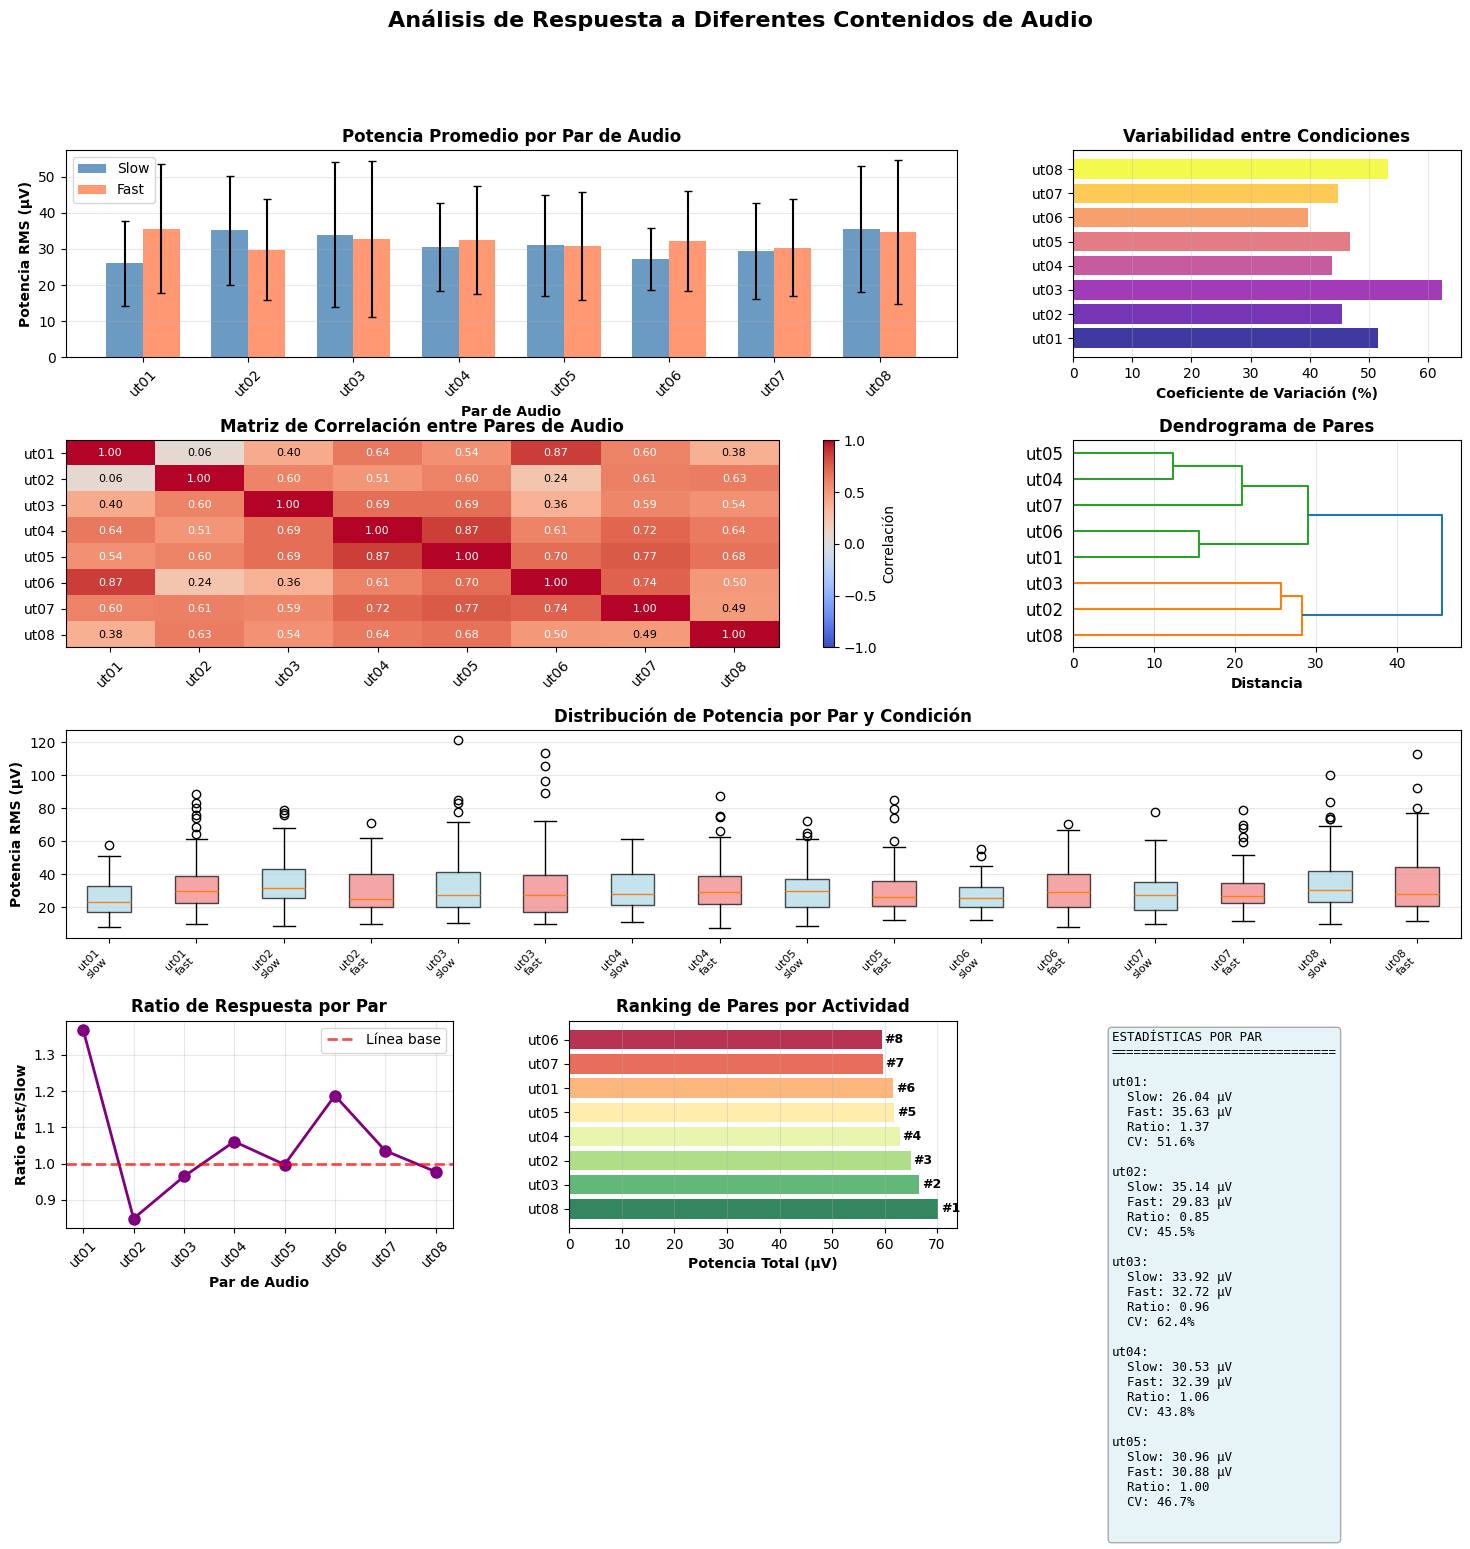


ANÁLISIS DETALLADO POR PAR DE AUDIO
 Par  Potencia Slow  Potencia Fast  Diferencia    Ratio    CV (%)  N observaciones
ut01      26.036814      35.628868    9.592054 1.368404 51.602406              140
ut02      35.143108      29.826563   -5.316545 0.848717 45.452160              140
ut03      33.916656      32.717743   -1.198914 0.964651 62.385189              160
ut04      30.529819      32.392357    1.862537 1.061007 43.774334              160
ut05      30.955673      30.876989   -0.078684 0.997458 46.736721              160
ut06      27.162231      32.264507    5.102276 1.187845 39.719643              160
ut07      29.320202      30.368219    1.048018 1.035744 44.787991              150
ut08      35.519985      34.737679   -0.782307 0.977976 53.182716              160

Par más activo: ut08
Par con mayor ratio Fast/Slow: ut01
Par más consistente: ut06


In [26]:
# 4. COMPARACIÓN ENTRE PARES DE AUDIO - Respuesta a Diferentes Contenidos

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.3)

fig.suptitle('Análisis de Respuesta a Diferentes Contenidos de Audio', fontsize=16, fontweight='bold')

# 4.1 Potencia promedio por par de audio
ax1 = fig.add_subplot(gs[0, :2])
pair_powers = {pair: {'slow': [], 'fast': []} for pair in audio_pairs}

for pair in audio_pairs:
    for participant in participants:
        for electrode in selected_channels:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            if slow_key in eeg_data and eeg_data[slow_key]['signal'] is not None:
                signal = eeg_data[slow_key]['signal']
                pair_powers[pair]['slow'].append(np.sqrt(np.mean(signal**2)))
            
            if fast_key in eeg_data and eeg_data[fast_key]['signal'] is not None:
                signal = eeg_data[fast_key]['signal']
                pair_powers[pair]['fast'].append(np.sqrt(np.mean(signal**2)))

x = np.arange(len(audio_pairs))
width = 0.35
slow_means = [np.mean(pair_powers[p]['slow']) if pair_powers[p]['slow'] else 0 for p in audio_pairs]
fast_means = [np.mean(pair_powers[p]['fast']) if pair_powers[p]['fast'] else 0 for p in audio_pairs]
slow_stds = [np.std(pair_powers[p]['slow']) if pair_powers[p]['slow'] else 0 for p in audio_pairs]
fast_stds = [np.std(pair_powers[p]['fast']) if pair_powers[p]['fast'] else 0 for p in audio_pairs]

ax1.bar(x - width/2, slow_means, width, yerr=slow_stds, label='Slow', 
        color='steelblue', alpha=0.8, capsize=3)
ax1.bar(x + width/2, fast_means, width, yerr=fast_stds, label='Fast', 
        color='coral', alpha=0.8, capsize=3)

ax1.set_xlabel('Par de Audio', fontweight='bold')
ax1.set_ylabel('Potencia RMS (µV)', fontweight='bold')
ax1.set_title('Potencia Promedio por Par de Audio', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(audio_pairs, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 4.2 Variabilidad entre pares
ax2 = fig.add_subplot(gs[0, 2])
pair_cv = []
for pair in audio_pairs:
    all_powers = pair_powers[pair]['slow'] + pair_powers[pair]['fast']
    if all_powers:
        cv = np.std(all_powers) / np.mean(all_powers) * 100
        pair_cv.append(cv)
    else:
        pair_cv.append(0)

colors_pair = plt.cm.plasma(np.linspace(0, 1, len(audio_pairs)))
bars = ax2.barh(audio_pairs, pair_cv, color=colors_pair, alpha=0.8)
ax2.set_xlabel('Coeficiente de Variación (%)', fontweight='bold')
ax2.set_title('Variabilidad entre Condiciones', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 4.3 Heatmap de correlación entre pares
ax3 = fig.add_subplot(gs[1, :2])

# Matriz de características por par
pair_features = []
for pair in audio_pairs:
    features = []
    for condition in ['slow', 'fast']:
        for electrode in selected_channels:
            electrode_powers = []
            for participant in participants:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    electrode_powers.append(np.sqrt(np.mean(signal**2)))
            features.append(np.mean(electrode_powers) if electrode_powers else 0)
    pair_features.append(features)

pair_features = np.array(pair_features)
corr_pairs = np.corrcoef(pair_features)

im = ax3.imshow(corr_pairs, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax3.set_xticks(range(len(audio_pairs)))
ax3.set_yticks(range(len(audio_pairs)))
ax3.set_xticklabels(audio_pairs, rotation=45)
ax3.set_yticklabels(audio_pairs)
ax3.set_title('Matriz de Correlación entre Pares de Audio', fontweight='bold')
plt.colorbar(im, ax=ax3, label='Correlación')

# Añadir valores
for i in range(len(audio_pairs)):
    for j in range(len(audio_pairs)):
        text = ax3.text(j, i, f'{corr_pairs[i, j]:.2f}',
                       ha="center", va="center", 
                       color="black" if abs(corr_pairs[i, j]) < 0.5 else "white",
                       fontsize=8)

# 4.4 Clustering de pares de audio
ax4 = fig.add_subplot(gs[1, 2])
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_pairs = linkage(pair_features, method='ward')
dendrogram(linkage_pairs, labels=audio_pairs, ax=ax4, orientation='right')
ax4.set_title('Dendrograma de Pares', fontweight='bold')
ax4.set_xlabel('Distancia', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# 4.5 Boxplot comparativo por par
ax5 = fig.add_subplot(gs[2, :])
data_to_plot = []
labels_to_plot = []

for pair in audio_pairs:
    for condition in ['slow', 'fast']:
        data_to_plot.append(pair_powers[pair][condition])
        labels_to_plot.append(f"{pair}\n{condition}")

bp = ax5.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)

# Colorear alternadamente
for i, patch in enumerate(bp['boxes']):
    if i % 2 == 0:  # slow
        patch.set_facecolor('lightblue')
    else:  # fast
        patch.set_facecolor('lightcoral')
    patch.set_alpha(0.7)

ax5.set_ylabel('Potencia RMS (µV)', fontweight='bold')
ax5.set_title('Distribución de Potencia por Par y Condición', fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# 4.6 Análisis de consistencia temporal
ax6 = fig.add_subplot(gs[3, 0])
# Calcular ratio fast/slow por par
ratios_by_pair = []
for pair in audio_pairs:
    if pair_powers[pair]['slow'] and pair_powers[pair]['fast']:
        ratio = np.mean(pair_powers[pair]['fast']) / np.mean(pair_powers[pair]['slow'])
        ratios_by_pair.append(ratio)
    else:
        ratios_by_pair.append(np.nan)

ax6.plot(audio_pairs, ratios_by_pair, 'o-', color='purple', linewidth=2, markersize=8)
ax6.axhline(y=1, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Línea base')
ax6.set_xlabel('Par de Audio', fontweight='bold')
ax6.set_ylabel('Ratio Fast/Slow', fontweight='bold')
ax6.set_title('Ratio de Respuesta por Par', fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)

# 4.7 Ranking de pares por actividad
ax7 = fig.add_subplot(gs[3, 1])
pair_total_power = []
for pair in audio_pairs:
    total = (np.mean(pair_powers[pair]['slow']) if pair_powers[pair]['slow'] else 0) + \
            (np.mean(pair_powers[pair]['fast']) if pair_powers[pair]['fast'] else 0)
    pair_total_power.append(total)

sorted_indices = np.argsort(pair_total_power)[::-1]
sorted_pairs = [audio_pairs[i] for i in sorted_indices]
sorted_powers = [pair_total_power[i] for i in sorted_indices]

colors_rank = plt.cm.RdYlGn_r(np.linspace(0, 1, len(sorted_pairs)))
bars = ax7.barh(sorted_pairs, sorted_powers, color=colors_rank, alpha=0.8)
ax7.set_xlabel('Potencia Total (µV)', fontweight='bold')
ax7.set_title('Ranking de Pares por Actividad', fontweight='bold')
ax7.grid(True, alpha=0.3, axis='x')

# Añadir ranking
for i, (bar, power) in enumerate(zip(bars, sorted_powers)):
    ax7.text(power + 0.5, i, f'#{i+1}', va='center', fontweight='bold', fontsize=9)

# 4.8 Tabla de estadísticas
ax8 = fig.add_subplot(gs[3, 2])
ax8.axis('off')

stats_text = "ESTADÍSTICAS POR PAR\n" + "="*30 + "\n\n"
for i, pair in enumerate(audio_pairs[:5]):  # Primeros 5
    stats_text += f"{pair}:\n"
    stats_text += f"  Slow: {np.mean(pair_powers[pair]['slow']):.2f} µV\n"
    stats_text += f"  Fast: {np.mean(pair_powers[pair]['fast']):.2f} µV\n"
    if pair_powers[pair]['slow']:
        ratio = np.mean(pair_powers[pair]['fast']) / np.mean(pair_powers[pair]['slow'])
        stats_text += f"  Ratio: {ratio:.2f}\n"
    stats_text += f"  CV: {pair_cv[i]:.1f}%\n\n"

ax8.text(0.1, 0.95, stats_text, transform=ax8.transAxes, fontsize=9,
         verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.tight_layout()
plt.show()

# Resumen estadístico completo
print("\n" + "="*80)
print("ANÁLISIS DETALLADO POR PAR DE AUDIO")
print("="*80)
pair_summary = []
for i, pair in enumerate(audio_pairs):
    slow_mean = np.mean(pair_powers[pair]['slow']) if pair_powers[pair]['slow'] else 0
    fast_mean = np.mean(pair_powers[pair]['fast']) if pair_powers[pair]['fast'] else 0
    pair_summary.append({
        'Par': pair,
        'Potencia Slow': slow_mean,
        'Potencia Fast': fast_mean,
        'Diferencia': fast_mean - slow_mean,
        'Ratio': fast_mean / slow_mean if slow_mean > 0 else np.nan,
        'CV (%)': pair_cv[i],
        'N observaciones': len(pair_powers[pair]['slow']) + len(pair_powers[pair]['fast'])
    })

df_pairs = pd.DataFrame(pair_summary)
print(df_pairs.to_string(index=False))
print(f"\nPar más activo: {df_pairs.loc[df_pairs['Potencia Slow'].idxmax(), 'Par']}")
print(f"Par con mayor ratio Fast/Slow: {df_pairs.loc[df_pairs['Ratio'].idxmax(), 'Par']}")
print(f"Par más consistente: {df_pairs.loc[df_pairs['CV (%)'].idxmin(), 'Par']}")

/var/folders/hw/gkt_y4dn77j710wygt9bsrjm0000gn/T/ipykernel_18904/713364463.py:278: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


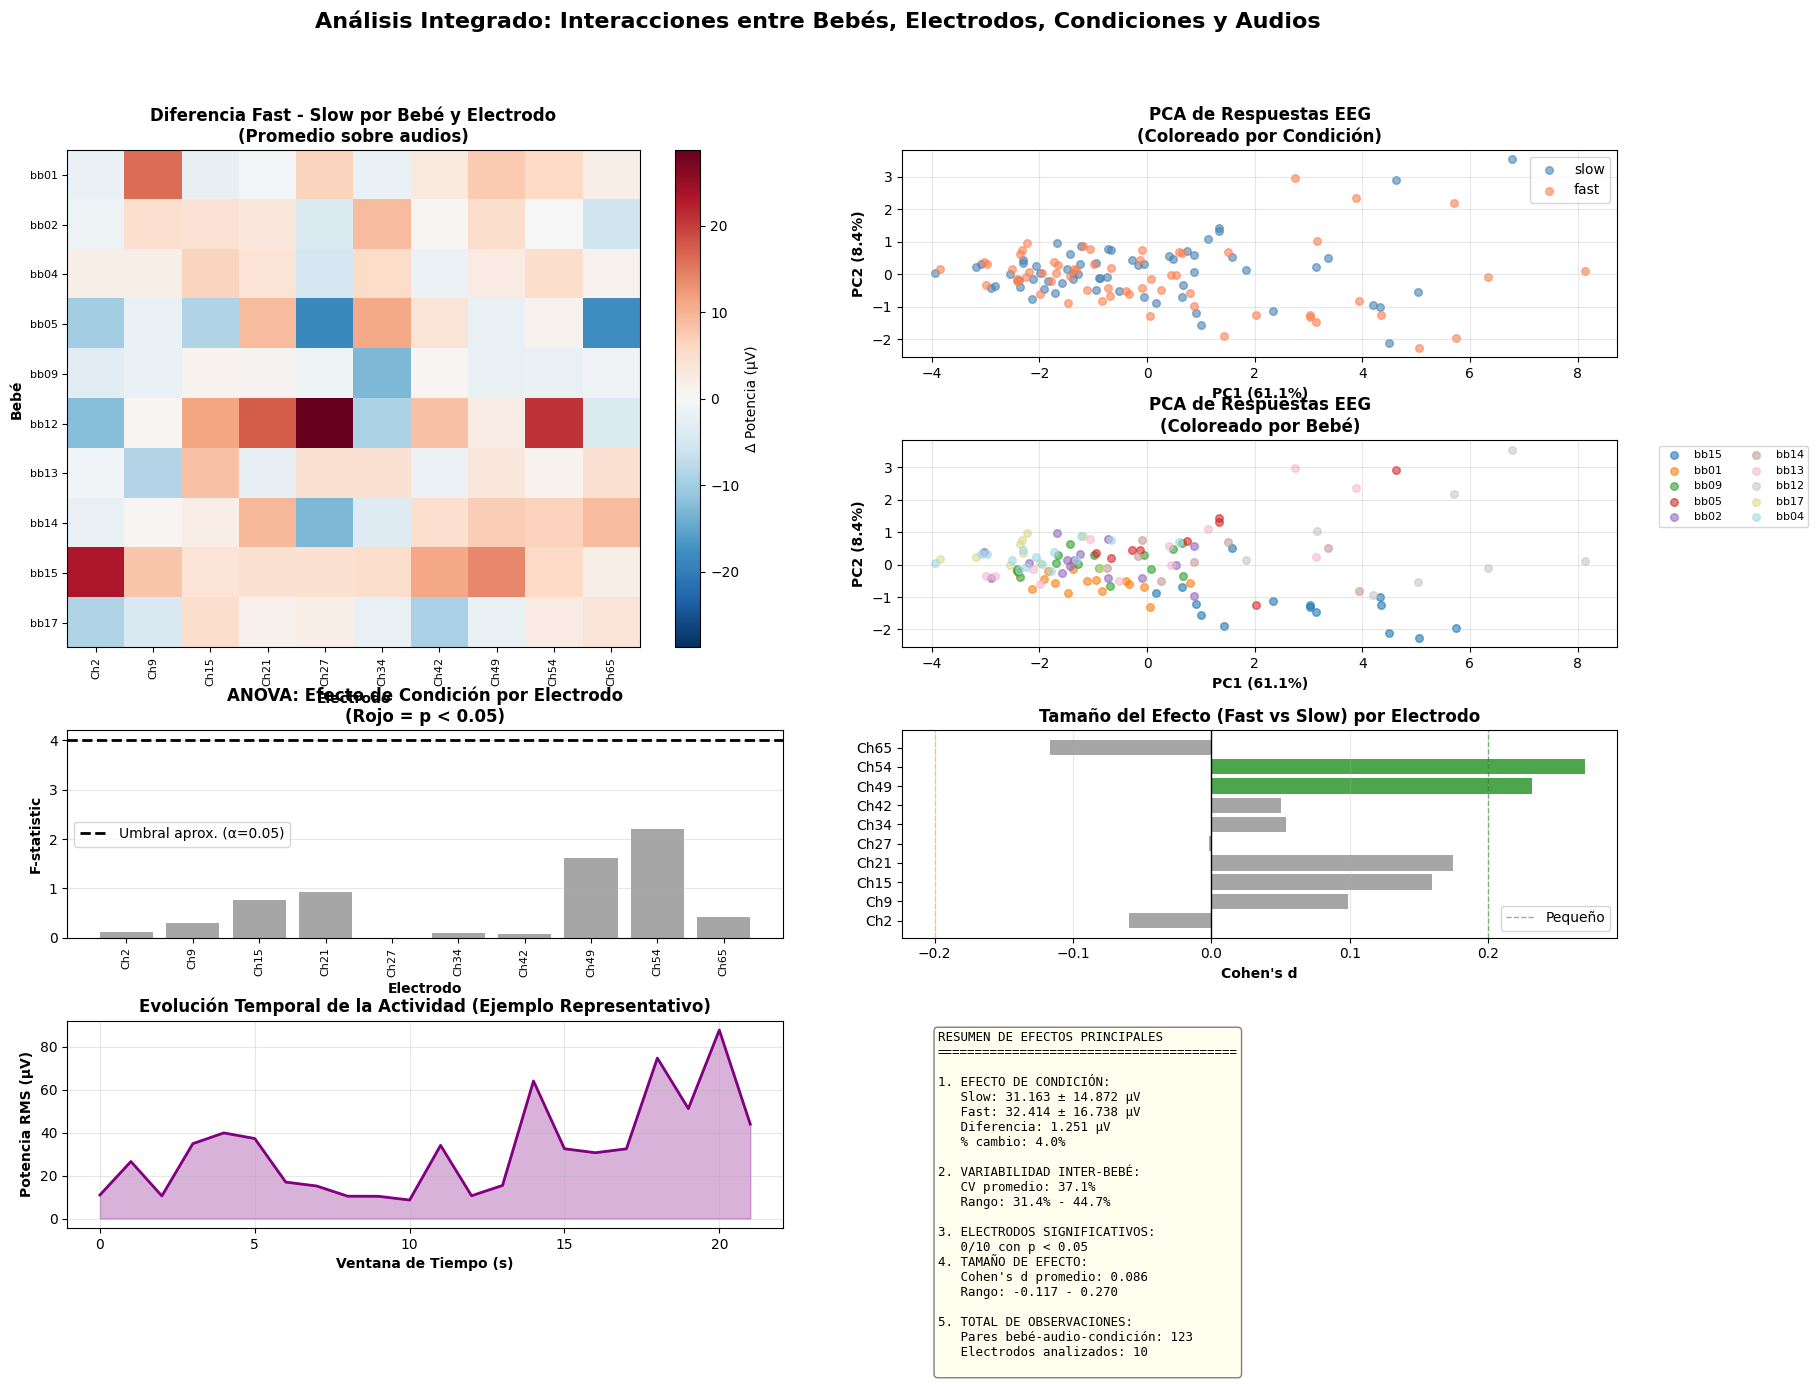


RESUMEN ESTADÍSTICO COMPLETO DEL ANÁLISIS

DATOS ANALIZADOS:
  - Bebés: 10
  - Pares de audio: 8
  - Electrodos: 10
  - Condiciones: 2 (slow, fast)
  - Total combinaciones: 1600
  - Observaciones válidas: 123

EFECTOS PRINCIPALES:
  1. Condición (Slow vs Fast): Δ = 1.251 µV
  2. Variabilidad entre bebés: CV = 37.1%
  3. Electrodos significativos: 0/10 (p < 0.05)
  4. Tamaño de efecto promedio: d = 0.086

VARIANZA EXPLICADA (PCA):
  - PC1: 61.1%
  - PC2: 8.4%
  - Total (2 componentes): 69.5%


In [27]:
# 5. ANÁLISIS COMBINADO: Interacción entre Todas las Variables

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 4, hspace=0.4, wspace=0.4)

fig.suptitle('Análisis Integrado: Interacciones entre Bebés, Electrodos, Condiciones y Audios', 
             fontsize=16, fontweight='bold')

# 5.1 Heatmap 3D colapsado: Bebé x Electrodo (promediado sobre audios)
ax1 = fig.add_subplot(gs[0:2, 0:2])
baby_electrode_matrix_slow = np.zeros((len(participants), len(selected_channels)))
baby_electrode_matrix_fast = np.zeros((len(participants), len(selected_channels)))

for p_idx, participant in enumerate(participants):
    for e_idx, electrode in enumerate(selected_channels):
        slow_vals = []
        fast_vals = []
        for pair in audio_pairs:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            if slow_key in eeg_data and eeg_data[slow_key]['signal'] is not None:
                signal = eeg_data[slow_key]['signal']
                slow_vals.append(np.sqrt(np.mean(signal**2)))
            
            if fast_key in eeg_data and eeg_data[fast_key]['signal'] is not None:
                signal = eeg_data[fast_key]['signal']
                fast_vals.append(np.sqrt(np.mean(signal**2)))
        
        baby_electrode_matrix_slow[p_idx, e_idx] = np.mean(slow_vals) if slow_vals else 0
        baby_electrode_matrix_fast[p_idx, e_idx] = np.mean(fast_vals) if fast_vals else 0

# Mostrar diferencia Fast - Slow
diff_matrix = baby_electrode_matrix_fast - baby_electrode_matrix_slow
im1 = ax1.imshow(diff_matrix, cmap='RdBu_r', aspect='auto', 
                 vmin=-np.abs(diff_matrix).max(), vmax=np.abs(diff_matrix).max())
ax1.set_xticks(range(len(selected_channels)))
ax1.set_yticks(range(len(participants)))
ax1.set_xticklabels(selected_channels, rotation=90, fontsize=8)
ax1.set_yticklabels(participants, fontsize=8)
ax1.set_xlabel('Electrodo', fontweight='bold')
ax1.set_ylabel('Bebé', fontweight='bold')
ax1.set_title('Diferencia Fast - Slow por Bebé y Electrodo\n(Promedio sobre audios)', fontweight='bold')
plt.colorbar(im1, ax=ax1, label='Δ Potencia (µV)')

# 5.2 PCA de respuestas
ax2 = fig.add_subplot(gs[0, 2:])
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Crear matriz de características: (bebés * pares * condiciones) x (electrodos)
features_matrix = []
labels_condition = []
labels_baby = []
labels_pair = []

for participant in participants:
    for pair in audio_pairs:
        for condition in ['slow', 'fast']:
            feature_vector = []
            for electrode in selected_channels:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    feature_vector.append(np.sqrt(np.mean(signal**2)))
                else:
                    feature_vector.append(0)
            
            if np.sum(feature_vector) > 0:  # Solo si tiene datos
                features_matrix.append(feature_vector)
                labels_condition.append(condition)
                labels_baby.append(participant)
                labels_pair.append(pair)

if len(features_matrix) > 0:
    features_matrix = np.array(features_matrix)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_matrix)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_scaled)
    
    # Graficar por condición
    for condition, color in [('slow', 'steelblue'), ('fast', 'coral')]:
        mask = np.array(labels_condition) == condition
        ax2.scatter(pca_result[mask, 0], pca_result[mask, 1], 
                   c=color, label=condition, alpha=0.6, s=30)
    
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
    ax2.set_title('PCA de Respuestas EEG\n(Coloreado por Condición)', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# 5.3 PCA coloreado por bebé
ax3 = fig.add_subplot(gs[1, 2:])
if len(features_matrix) > 0:
    unique_babies = list(set(labels_baby))
    colors_babies = plt.cm.tab20(np.linspace(0, 1, len(unique_babies)))
    
    for i, baby in enumerate(unique_babies):
        mask = np.array(labels_baby) == baby
        ax3.scatter(pca_result[mask, 0], pca_result[mask, 1], 
                   c=[colors_babies[i]], label=baby, alpha=0.6, s=30)
    
    ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontweight='bold')
    ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontweight='bold')
    ax3.set_title('PCA de Respuestas EEG\n(Coloreado por Bebé)', fontweight='bold')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=2)
    ax3.grid(True, alpha=0.3)

# 5.4 Análisis de varianza (ANOVA)
ax4 = fig.add_subplot(gs[2, :2])
from scipy.stats import f_oneway

# Calcular F-statistic para cada electrodo
f_stats = []
p_values = []

for electrode in selected_channels:
    groups = []
    for condition in ['slow', 'fast']:
        group_data = []
        for participant in participants:
            for pair in audio_pairs:
                key = f"{participant}_{pair}_{condition}_{electrode}"
                if key in eeg_data and eeg_data[key]['signal'] is not None:
                    signal = eeg_data[key]['signal']
                    group_data.append(np.sqrt(np.mean(signal**2)))
        groups.append(group_data)
    
    if len(groups[0]) > 0 and len(groups[1]) > 0:
        f_stat, p_val = f_oneway(groups[0], groups[1])
        f_stats.append(f_stat)
        p_values.append(p_val)
    else:
        f_stats.append(0)
        p_values.append(1)

# Graficar
bars = ax4.bar(range(len(selected_channels)), f_stats, 
              color=['red' if p < 0.05 else 'gray' for p in p_values], alpha=0.7)
ax4.axhline(y=4, color='black', linestyle='--', linewidth=2, label='Umbral aprox. (α=0.05)')
ax4.set_xticks(range(len(selected_channels)))
ax4.set_xticklabels(selected_channels, rotation=90, fontsize=8)
ax4.set_xlabel('Electrodo', fontweight='bold')
ax4.set_ylabel('F-statistic', fontweight='bold')
ax4.set_title('ANOVA: Efecto de Condición por Electrodo\n(Rojo = p < 0.05)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5.5 Matriz de efectos
ax5 = fig.add_subplot(gs[2, 2:])
effect_sizes = []
for electrode in selected_channels:
    slow_data = []
    fast_data = []
    for participant in participants:
        for pair in audio_pairs:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            if slow_key in eeg_data and eeg_data[slow_key]['signal'] is not None:
                signal = eeg_data[slow_key]['signal']
                slow_data.append(np.sqrt(np.mean(signal**2)))
            
            if fast_key in eeg_data and eeg_data[fast_key]['signal'] is not None:
                signal = eeg_data[fast_key]['signal']
                fast_data.append(np.sqrt(np.mean(signal**2)))
    
    # Cohen's d
    if slow_data and fast_data:
        mean_diff = np.mean(fast_data) - np.mean(slow_data)
        pooled_std = np.sqrt((np.std(slow_data)**2 + np.std(fast_data)**2) / 2)
        cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0
        effect_sizes.append(cohens_d)
    else:
        effect_sizes.append(0)

bars = ax5.barh(selected_channels, effect_sizes, 
               color=['green' if d > 0.2 else 'orange' if d < -0.2 else 'gray' for d in effect_sizes],
               alpha=0.7)
ax5.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax5.axvline(x=0.2, color='green', linestyle='--', linewidth=1, alpha=0.5, label='Pequeño')
ax5.axvline(x=-0.2, color='orange', linestyle='--', linewidth=1, alpha=0.5)
ax5.set_xlabel("Cohen's d", fontweight='bold')
ax5.set_title('Tamaño del Efecto (Fast vs Slow) por Electrodo', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3, axis='x')

# 5.6 Serie temporal de actividad promedio
ax6 = fig.add_subplot(gs[3, :2])
# Promedio de potencia en ventanas de tiempo
if len(features_matrix) > 0:
    # Tomar una señal representativa larga
    representative_key = None
    max_length = 0
    for key, data in eeg_data.items():
        if data['signal'] is not None and len(data['signal']) > max_length:
            representative_key = key
            max_length = len(data['signal'])
    
    if representative_key:
        signal_data = eeg_data[representative_key]['signal']
        window_size = int(Fs_eeg * 1)  # Ventana de 1 segundo
        n_windows = len(signal_data) // window_size
        
        time_windows = []
        power_windows = []
        
        for i in range(n_windows):
            start = i * window_size
            end = start + window_size
            window = signal_data[start:end]
            time_windows.append(i)
            power_windows.append(np.sqrt(np.mean(window**2)))
        
        ax6.plot(time_windows, power_windows, color='purple', linewidth=2)
        ax6.fill_between(time_windows, power_windows, alpha=0.3, color='purple')
        ax6.set_xlabel('Ventana de Tiempo (s)', fontweight='bold')
        ax6.set_ylabel('Potencia RMS (µV)', fontweight='bold')
        ax6.set_title('Evolución Temporal de la Actividad (Ejemplo Representativo)', fontweight='bold')
        ax6.grid(True, alpha=0.3)

# 5.7 Resumen de efectos principales
ax7 = fig.add_subplot(gs[3, 2:])
ax7.axis('off')

summary_text = "RESUMEN DE EFECTOS PRINCIPALES\n" + "="*40 + "\n\n"

# Efecto de condición
slow_all = []
fast_all = []
for participant in participants:
    for pair in audio_pairs:
        for electrode in selected_channels:
            slow_key = f"{participant}_{pair}_slow_{electrode}"
            fast_key = f"{participant}_{pair}_fast_{electrode}"
            
            if slow_key in eeg_data and eeg_data[slow_key]['signal'] is not None:
                signal = eeg_data[slow_key]['signal']
                slow_all.append(np.sqrt(np.mean(signal**2)))
            
            if fast_key in eeg_data and eeg_data[fast_key]['signal'] is not None:
                signal = eeg_data[fast_key]['signal']
                fast_all.append(np.sqrt(np.mean(signal**2)))

if slow_all and fast_all:
    summary_text += f"1. EFECTO DE CONDICIÓN:\n"
    summary_text += f"   Slow: {np.mean(slow_all):.3f} ± {np.std(slow_all):.3f} µV\n"
    summary_text += f"   Fast: {np.mean(fast_all):.3f} ± {np.std(fast_all):.3f} µV\n"
    summary_text += f"   Diferencia: {np.mean(fast_all) - np.mean(slow_all):.3f} µV\n"
    summary_text += f"   % cambio: {(np.mean(fast_all) - np.mean(slow_all))/np.mean(slow_all)*100:.1f}%\n\n"

summary_text += f"2. VARIABILIDAD INTER-BEBÉ:\n"
summary_text += f"   CV promedio: {np.mean(baby_cv):.1f}%\n"
summary_text += f"   Rango: {np.min(baby_cv):.1f}% - {np.max(baby_cv):.1f}%\n\n"

summary_text += f"3. ELECTRODOS SIGNIFICATIVOS:\n"
n_sig = sum(1 for p in p_values if p < 0.05)
summary_text += f"   {n_sig}/{len(selected_channels)} con p < 0.05\n"
if n_sig > 0:
    sig_electrodes = [selected_channels[i] for i, p in enumerate(p_values) if p < 0.05]
    summary_text += f"   Electrodos: {', '.join(sig_electrodes[:5])}\n\n"

summary_text += f"4. TAMAÑO DE EFECTO:\n"
summary_text += f"   Cohen's d promedio: {np.mean(effect_sizes):.3f}\n"
summary_text += f"   Rango: {np.min(effect_sizes):.3f} - {np.max(effect_sizes):.3f}\n\n"

summary_text += f"5. TOTAL DE OBSERVACIONES:\n"
summary_text += f"   Pares bebé-audio-condición: {len(features_matrix)}\n"
summary_text += f"   Electrodos analizados: {len(selected_channels)}\n"

ax7.text(0.05, 0.95, summary_text, transform=ax7.transAxes, fontsize=9,
         verticalalignment='top', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.tight_layout()
plt.show()

# Imprimir resumen estadístico completo
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO COMPLETO DEL ANÁLISIS")
print("="*80)
print(f"\nDATOS ANALIZADOS:")
print(f"  - Bebés: {len(participants)}")
print(f"  - Pares de audio: {len(audio_pairs)}")
print(f"  - Electrodos: {len(selected_channels)}")
print(f"  - Condiciones: 2 (slow, fast)")
print(f"  - Total combinaciones: {len(participants) * len(audio_pairs) * 2 * len(selected_channels)}")
print(f"  - Observaciones válidas: {len(features_matrix)}")

print(f"\nEFECTOS PRINCIPALES:")
print(f"  1. Condición (Slow vs Fast): Δ = {np.mean(fast_all) - np.mean(slow_all):.3f} µV")
print(f"  2. Variabilidad entre bebés: CV = {np.mean(baby_cv):.1f}%")
print(f"  3. Electrodos significativos: {n_sig}/{len(selected_channels)} (p < 0.05)")
print(f"  4. Tamaño de efecto promedio: d = {np.mean(effect_sizes):.3f}")

print(f"\nVARIANZA EXPLICADA (PCA):")
if len(features_matrix) > 0:
    print(f"  - PC1: {pca.explained_variance_ratio_[0]:.1%}")
    print(f"  - PC2: {pca.explained_variance_ratio_[1]:.1%}")
    print(f"  - Total (2 componentes): {sum(pca.explained_variance_ratio_[:2]):.1%}")

### Hallazgos Clave:

1. **Estructura de Datos**:
   - Archivos contienen `subeeg` (EEG), `y` (audio), y `Fs` (frecuencia de muestreo)
   - 47 electrodos buenos de 65 totales
   - Frecuencia de muestreo EEG: ~250 Hz
   - Frecuencia de muestreo Audio: 44100 Hz

2. **Calidad de Datos**:
   - Sin valores NaN o Inf
   - Amplitudes en rango razonable
   - Estructura consistente entre archivos

3. **Características de las Condiciones**:
   - **Audio Lento**: Mismo contenido de audio a velocidad normal
   - **Audio Rápido**: Mismo contenido de audio acelerado
   - Las señales EEG capturan la respuesta cerebral a cada condición
   - Duraciones de grabación variables entre archivos

4. **Inventario de Archivos**:
   - Condición lenta: ~710 archivos
   - Condición rápida: ~706 archivos
   - Las grabaciones lentas son más largas (mismo audio a menor velocidad)

### Objetivo del Análisis:

Comparar la **conectividad cerebral** (señales EEG) entre las dos condiciones auditivas para identificar cómo el cerebro procesa audio a diferentes velocidades.

### Recomendaciones para Preprocesamiento:

1. **Bandas de Frecuencia EEG**:
   - Delta: 0.5-4 Hz
   - Theta: 4-8 Hz
   - Alpha: 8-13 Hz (banda prioritaria para atención)
   - Beta: 13-30 Hz
   - Gamma: 30-50 Hz

2. **Parámetros de Ventana Deslizante**:
   - Tamaño: 1-2 segundos
   - Solapamiento: 75%

3. **Diseño de Filtros**:
   - Filtros Butterworth pasabanda (orden 4-5)
   - Filtrado de fase cero (filtfilt)

4. **Organización de Datos**:
   - Procesar solo electrodos buenos (47 canales)
   - Manejar grabaciones de longitud variable
   - Mantener separación entre condiciones (slow/fast)

**Listo para proceder a Fase 1: Preprocesamiento**
